In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
pd.options.display.float_format="{:.5f}".format
data=pd.read_csv('data/include_all_merge.csv')
data.head()

,Unnamed: 0,콜금리(%),loanapply_month,loanapply_day,application_id,bank_id,product_id,loan_limit,loan_rate,is_applied,...,loanapply_week,loanapply_time,time_at_work,기준금리,생활물가지수,소비자심리지수,나이대,핀다,대출,금리
0,0,1.39000,3,1,475785,25,169,23000000.00000,16.90000,0.00000,...,Tuesday,13:59:32,0.00000,1.25000,1.20000,103.20000,20,23.00000,58.00000,20.00000
1,1,1.39000,3,1,475785,29,265,28000000.00000,5.90000,0.00000,...,Tuesday,13:59:31,0.00000,1.25000,1.20000,103.20000,20,23.00000,58.00000,20.00000
2,2,1.39000,3,1,475785,64,254,22000000.00000,13.20000,0.00000,...,Tuesday,13:59:32,0.00000,1.25000,1.20000,103.20000,20,23.00000,58.00000,20.00000
3,3,1.39000,3,1,475785,18,188,6000000.00000,5.30000,0.00000,...,Tuesday,13:59:31,0.00000,1.25000,1.20000,103.20000,20,23.00000,58.00000,20.00000
4,4,1.39000,3,1,475785,1,61,11000000.00000,12.90000,0.00000,...,Tuesday,13:59:32,0.00000,1.25000,1.20000,103.20000,20,23.00000,58.00000,20.00000


## 시각화한 데이터 분포보고 정규화한 데이터로 변경

### 기대출수, 금액

<AxesSubplot:>

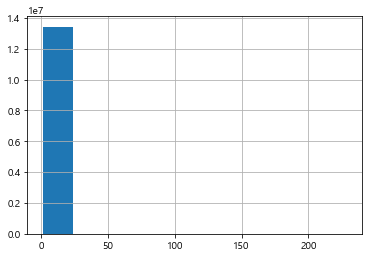

In [ ]:
data['existing_loan_cnt'].hist()

<AxesSubplot:>

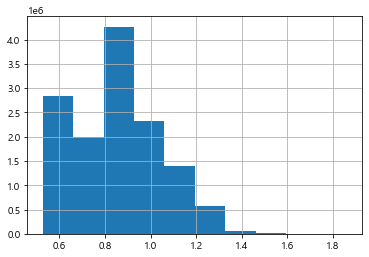

In [ ]:
np.log1p(np.log1p(data['existing_loan_cnt'])).hist()

In [ ]:
#K정규분포 = 왜도 0
from scipy.stats import skew
skew(np.log1p(np.log1p(data['existing_loan_cnt'])))

-0.03944412792095079

<AxesSubplot:>

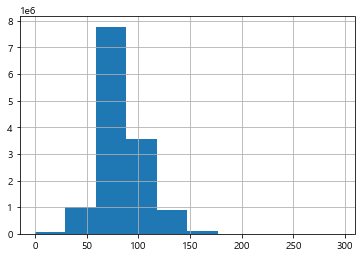

In [ ]:
np.sqrt(np.sqrt(data['existing_loan_amt'])).hist() 

In [ ]:
skew(np.sqrt(np.sqrt(data['existing_loan_amt'])))

0.3847168133509145

### 금리

<AxesSubplot:>

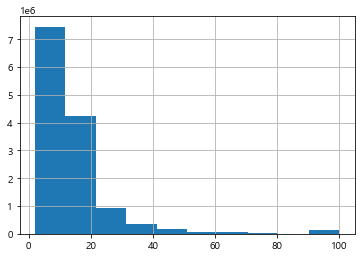

In [ ]:
data['금리'].hist()

<AxesSubplot:>

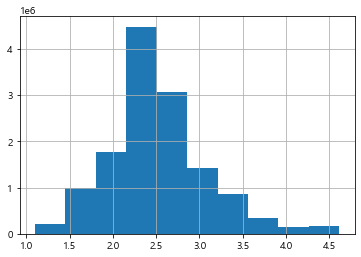

In [ ]:
np.log1p(data['금리']).hist()

In [ ]:
skew(np.log1p(data['금리']))

0.8672971971479673

### 대출, 금리

<AxesSubplot:>

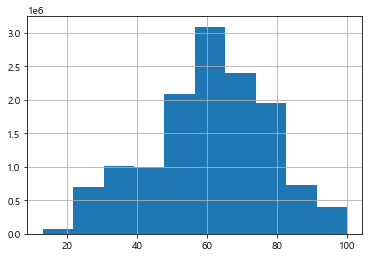

In [ ]:
data['대출'].hist()

In [ ]:
skew(np.log1p(data['금리']))

0.8672971971479673

### 핀다

In [ ]:
skew(data['핀다'])

0.016282508771206496

### loan_limit

<AxesSubplot:>

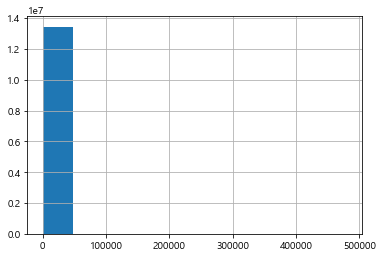

In [ ]:
np.sqrt(data['loan_limit']).hist()

In [ ]:
skew(data['loan_limit'])

2636.2163606700765

In [ ]:
skew(np.sqrt(np.sqrt(np.sqrt(np.sqrt(data['loan_limit'])))))

-2.415476180830011

<AxesSubplot:>

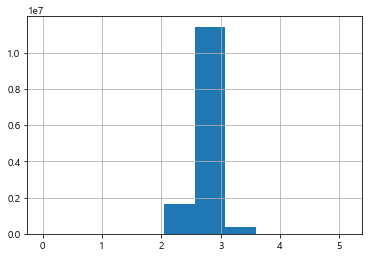

In [ ]:
np.sqrt(np.sqrt(np.sqrt(np.sqrt(data['loan_limit'])))).hist() 

### desired_amount, yearly_income

In [ ]:
# skew(np.sqrt(np.sqrt(np.sqrt(data['desired_amount']))))

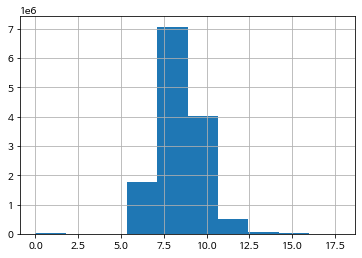

In [3]:
np.sqrt(np.sqrt(np.sqrt(data['desired_amount']))).hist()

In [ ]:
# skew(np.sqrt(np.sqrt(data['yearly_income'])))

1.5722023148864823

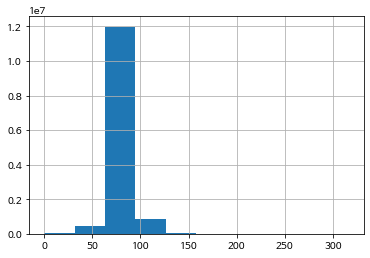

In [4]:
np.sqrt(np.sqrt(data['yearly_income'])).hist()

## 정규분포화 로그,제곱근 변환

In [3]:
# 정규분포화 로그,제곱근 변환
data1=data.drop(['Unnamed: 0','loanapply_month','rehabilitation_yn','기준금리', '나이대','loanapply_time'],axis=1)
data1['existing_loan_cnt']=np.log1p(data['existing_loan_cnt'])
data1['existing_loan_amt']=np.sqrt(np.sqrt(data['existing_loan_amt']))
data1['금리']=np.log1p(data['금리'])
data1['loan_limit']=np.sqrt(np.sqrt(np.sqrt(np.sqrt(data['loan_limit']))))
data1['desired_amount']=np.sqrt(np.sqrt(np.sqrt(data['desired_amount'])))
data1['yearly_income']=np.sqrt(np.sqrt(data['yearly_income']))

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13442614 entries, 0 to 13442613
Data columns (total 27 columns):
 #   Column             Dtype  
---  ------             -----  
 0   콜금리(%)             float64
 1   loanapply_day      int64  
 2   application_id     int64  
 3   bank_id            int64  
 4   product_id         int64  
 5   loan_limit         float64
 6   loan_rate          float64
 7   is_applied         float64
 8   user_id            float64
 9   birth_year         float64
 10  credit_score       float64
 11  yearly_income      float64
 12  income_type        object 
 13  employment_type    object 
 14  houseown_type      object 
 15  desired_amount     float64
 16  purpose            object 
 17  existing_loan_cnt  float64
 18  existing_loan_amt  float64
 19  gender             float64
 20  loanapply_week     object 
 21  time_at_work       float64
 22  생활물가지수             float64
 23  소비자심리지수            float64
 24  핀다                 float64
 25  대출              

In [134]:
# 더미화
data_dum = pd.get_dummies(data1, columns = ['income_type','employment_type','houseown_type','purpose','loanapply_week'])

# 라벨 지정
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_dum['application_id']=le.fit_transform(data_dum['application_id'])
data_dum['bank_id']=le.fit_transform(data_dum['bank_id'])
data_dum['product_id']=le.fit_transform(data_dum['product_id'])
data_dum['user_id']=le.fit_transform(data_dum['user_id'])

# 데이터 분리
ii=data_dum[data_dum.is_applied.isnull()].index
train=data_dum.drop(ii) # 3,4,5월 
test=data_dum.loc[ii] # 6월(실제 예측해야할 값)

# train/test로 나누기(1과 0이 train과 test에 각각 7:3으로 올바르게 들어가게 하기 위해)
# train_1 : 라벨 1인 데이터, train_0 : 라벨 0인 데이터
train_1 = data_dum[data_dum['is_applied']==1]
train_1_X = train_1.drop('is_applied',axis=1)
train_1_y = train_1['is_applied']

train_0 = data_dum[data_dum['is_applied']==0]
train_0_X = train_0.drop('is_applied',axis=1)
train_0_y = train_0['is_applied']

from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(train_1_X, train_1_y, test_size=0.3, random_state=42)
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(train_0_X, train_0_y, test_size=0.3, random_state=42)

X_train = pd.concat([X_train_1, X_train_0])
y_train = pd.concat([y_train_1, y_train_0])

X_test = pd.concat([X_test_1, X_test_0])
y_test = pd.concat([y_test_1, y_test_0])

In [4]:
ii=data[data.is_applied.isnull()].index
train=data.drop(ii) # 3,4,5월 
test=data.loc[ii] # 6월(실제 예측해야할 값)

In [7]:
test.head()

,Unnamed: 0,콜금리(%),loanapply_month,loanapply_day,application_id,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,gender,rehabilitation_yn,loanapply_week,loanapply_time,time_at_work,기준금리,생활물가지수,소비자심리지수,나이대,핀다,대출,금리
10187132,10187132,1.86000,6,1,2111151,50,142,44000000.00000,18.10000,NaN,731924.00000,1997.00000,660.00000,36000000.00000,EARNEDINCOME,일용직,전월세,50000000.00000,주택구입,3.00000,12000000.00000,0.00000,0,Wednesday,16:01:48,1.00000,1.75000,0.80000,96.40000,20,27.00000,51.00000,15.00000
10187133,10187133,1.86000,6,1,2111151,37,206,10000000.00000,19.90000,NaN,731924.00000,1997.00000,660.00000,36000000.00000,EARNEDINCOME,일용직,전월세,50000000.00000,주택구입,3.00000,12000000.00000,0.00000,0,Wednesday,16:01:50,1.00000,1.75000,0.80000,96.40000,20,27.00000,51.00000,15.00000
10187134,10187134,1.86000,6,1,2111151,33,110,18000000.00000,13.50000,NaN,731924.00000,1997.00000,660.00000,36000000.00000,EARNEDINCOME,일용직,전월세,50000000.00000,주택구입,3.00000,12000000.00000,0.00000,0,Wednesday,16:01:49,1.00000,1.75000,0.80000,96.40000,20,27.00000,51.00000,15.00000
10187135,10187135,1.86000,6,1,2111151,46,49,28000000.00000,13.50000,NaN,731924.00000,1997.00000,660.00000,36000000.00000,EARNEDINCOME,일용직,전월세,50000000.00000,주택구입,3.00000,12000000.00000,0.00000,0,Wednesday,16:01:50,1.00000,1.75000,0.80000,96.40000,20,27.00000,51.00000,15.00000
10187136,10187136,1.86000,6,1,2111151,24,229,15000000.00000,9.50000,NaN,731924.00000,1997.00000,660.00000,36000000.00000,EARNEDINCOME,일용직,전월세,50000000.00000,주택구입,3.00000,12000000.00000,0.00000,0,Wednesday,16:01:48,1.00000,1.75000,0.80000,96.40000,20,27.00000,51.00000,15.00000


In [8]:
test.shape

(3255482, 33)

In [9]:
# 예측에 사용될 6월 데이터(더미화 전에 저장하기)
test_f = test.drop('is_applied',axis = 1)

In [10]:
# X_test_df.csv 에 따로 저장(더미화 전에 저장하기)
test_f.to_csv('custom_pred/X_test_df.csv', index=False)

In [6]:
pd.set_option('display.max_columns', None) ## 모든 열을 출력한다.

In [135]:
del train_1_X
del train_1_y
del train_0_X
del train_0_y
del X_train_1
del X_train_0
del X_test_1
del X_test_0
del y_train_1
del y_train_0
del y_test_1
del y_test_0
del ii
del data_dum
del data1
del data

In [136]:
train_all=X_train.copy()
train_all['is_applied']=y_train
y_train.shape

(7130991,)

In [137]:
y_train.value_counts()

0.00000    6745316
1.00000     385675
Name: is_applied, dtype: int64

In [138]:
y_test.value_counts()

0.00000    2890851
1.00000     165290
Name: is_applied, dtype: int64

In [140]:
# 1인 행 0인 행 나누기
train_all_1 = train_all[train_all['is_applied']==1]
train_all_0 = train_all[train_all['is_applied']==0]

In [141]:
print(train_all_1.shape)
print(train_all_0.shape)

(385675, 51)
(6745316, 51)


## RandomSampling
+ y_train에서 is_applied가 1인 개수가 385675개이므로 6745316개의 0인 data 중에서 randomsampling 진행
+ 크기는 is_applied가 1인 개수와 동일한 만큼으로 구성
+ 5번의 검정 절차를 위해 385675 x 5만큼 먼저 뽑고, 랜덤으로 구성된 데이터이기에 indexing으로 데이터 잘라줌 

In [144]:
# 0인 행 192만개 생성 후 5등분 해서 38만개씩 만들기
train_all_0_192 = train_all_0.sample(n=1928375, random_state=42).reset_index(drop=True)

In [145]:
train_all_0_192_1 = train_all_0_192.iloc[:385675]
train_all_0_192_2 = train_all_0_192.iloc[385675:385675*2]
train_all_0_192_3 = train_all_0_192.iloc[385675*2:385675*3]
train_all_0_192_4 = train_all_0_192.iloc[385675*3:385675*4]
train_all_0_192_5 = train_all_0_192.iloc[385675*4:]

In [146]:
# 확인용 print
print(train_all_0_192.shape)

print(train_all_0_192_1.shape)
print(train_all_0_192_2.shape)
print(train_all_0_192_3.shape)
print(train_all_0_192_4.shape)
print(train_all_0_192_5.shape)

(1928375, 51)
(385675, 51)
(385675, 51)
(385675, 51)
(385675, 51)
(385675, 51)


In [147]:
#1인 행 38만개 
train_all_1_38 = train_all_1.sample(n=385675, random_state=42).reset_index(drop=True)

In [148]:
print(train_all_1_38.shape)

(385675, 51)


In [ ]:
'''
여기까지 정리하면
train_all_0_192_1 ~ 5 + train_all_1_38: train

'''

In [149]:
train_38_1 = pd.concat([train_all_0_192_1,train_all_1_38])
train_38_2 = pd.concat([train_all_0_192_2,train_all_1_38])
train_38_3 = pd.concat([train_all_0_192_3,train_all_1_38])
train_38_4 = pd.concat([train_all_0_192_4,train_all_1_38])
train_38_5 = pd.concat([train_all_0_192_5,train_all_1_38])

In [150]:
train_38_1.shape

(771350, 51)

In [151]:
# 평가 지표
from sklearn.metrics import recall_score, precision_score, accuracy_score, confusion_matrix, f1_score, roc_auc_score

def display_eval(test_y, pred):
    confusion = confusion_matrix(test_y, pred)
    accuracy = accuracy_score(test_y, pred)
    precision = precision_score(test_y, pred)
    recall = recall_score(test_y, pred)
    f1 = f1_score(test_y, pred)
    roc_score = roc_auc_score(test_y, pred)
    print(confusion)
    print('*'*50)
    print()
    print('정확도 : {0:.2f}, 정밀도 : {1:.2f}, 재현율 : {2:.2f}'.format(accuracy, precision, recall))
    print('f1-score : {0:.2f}, auc : {1:.2f}'.format(f1, roc_score))

In [153]:
train_38_2['is_applied'].value_counts()

0.00000    385675
1.00000    385675
Name: is_applied, dtype: int64

In [154]:
y_train.value_counts()

0.00000    6745316
1.00000     385675
Name: is_applied, dtype: int64

In [155]:
real_train_x1 = train_38_1.drop('is_applied',axis = 1)
real_train_y1 = train_38_1['is_applied']

real_train_x2 = train_38_2.drop('is_applied',axis = 1)
real_train_y2 = train_38_2['is_applied']

real_train_x3 = train_38_3.drop('is_applied',axis = 1)
real_train_y3 = train_38_3['is_applied']

real_train_x4 = train_38_4.drop('is_applied',axis = 1)
real_train_y4 = train_38_4['is_applied']

real_train_x5 = train_38_5.drop('is_applied',axis = 1)
real_train_y5 = train_38_5['is_applied']

In [ ]:
'''
여기까지 정리
real_train_x1~ 5, real_train_y1~5 : train
X_test, y_test : test
'''

In [156]:
del train_38_1
del train_38_2
del train_38_3
del train_38_4
del train_38_5
del train_all_0_192
del train_all_0_192_1
del train_all_0_192_2
del train_all_0_192_3
del train_all_0_192_4
del train_all_0_192_5

### test(6월 데이터) 처리

In [157]:
test.head()

,콜금리(%),loanapply_day,application_id,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,...,purpose_전월세보증금,purpose_주택구입,purpose_투자,loanapply_week_Friday,loanapply_week_Monday,loanapply_week_Saturday,loanapply_week_Sunday,loanapply_week_Thursday,loanapply_week_Tuesday,loanapply_week_Wednesday
10187132,1.86000,1,938648,49,84,3.00411,18.10000,NaN,261503,1997.00000,...,0,1,0,0,0,0,0,0,0,1
10187133,1.86000,1,938648,36,125,2.73842,19.90000,NaN,261503,1997.00000,...,0,1,0,0,0,0,0,0,0,1
10187134,1.86000,1,938648,32,63,2.84089,13.50000,NaN,261503,1997.00000,...,0,1,0,0,0,0,0,0,0,1
10187135,1.86000,1,938648,45,26,2.92043,13.50000,NaN,261503,1997.00000,...,0,1,0,0,0,0,0,0,0,1
10187136,1.86000,1,938648,23,138,2.80870,9.50000,NaN,261503,1997.00000,...,0,1,0,0,0,0,0,0,0,1


In [158]:
test.shape

(3255482, 51)

In [159]:
# 예측에 사용될 6월 데이터(라벨 인코딩 후)
test_f = test.drop('is_applied',axis = 1)

### 스케일링
345월 중에 0.3 비율로 뽑은 X_test 테스트 셋과 6월 데이터인 test_f 모두 StandardScaler을 활용하여 정규화

In [160]:
# 데이터 정규화하기
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()

sd.fit(real_train_x1)
real_train_x1_scaled=sd.transform(real_train_x1)
X_test_1_scaled=sd.transform(X_test)
test_f_scaled_1=sd.transform(test_f)

sd.fit(real_train_x2)
real_train_x2_scaled=sd.transform(real_train_x2)
X_test_2_scaled=sd.transform(X_test)
test_f_scaled_2 =sd.transform(test_f)


sd.fit(real_train_x3)
real_train_x3_scaled=sd.transform(real_train_x3)
X_test_3_scaled=sd.transform(X_test)
test_f_scaled_3 =sd.transform(test_f)


sd.fit(real_train_x4)
real_train_x4_scaled=sd.transform(real_train_x4)
X_test_4_scaled=sd.transform(X_test)
test_f_scaled_4 =sd.transform(test_f)


sd.fit(real_train_x5)
real_train_x5_scaled=sd.transform(real_train_x5)
X_test_5_scaled=sd.transform(X_test)
test_f_scaled_5 =sd.transform(test_f)

In [161]:
del real_train_x1
del real_train_x2
del real_train_x3
del real_train_x4
del real_train_x5

In [26]:
del X_test

In [ ]:
'''
여기부터 모델 5개
'''

In [77]:
y_test.shape

(3056141,)

In [55]:
y_test.head()

3981732   1.00000
4289014   1.00000
4370456   1.00000
1334121   1.00000
7603089   1.00000
Name: is_applied, dtype: float64

In [58]:
y_test_df = pd.Series(y_test, name='y_test')
y_test_df

3981732   1.00000
4289014   1.00000
4370456   1.00000
1334121   1.00000
7603089   1.00000
            ...  
580560    0.00000
2807703   0.00000
9373655   0.00000
9704783   0.00000
7697471   0.00000
Name: y_test, Length: 3056141, dtype: float64

In [89]:
# y_test_df.csv에 345월 중 30%에 해당하는 테스트용 y값 저장
y_test_df.to_csv('custom_pred/y_test_df.csv', index=False)

## LogisticRegression
5개의 데이터셋에 대하여 각각 훈련

#### 모델 1(real_train_x1_scaled 사용)

In [166]:
# 로지스틱
from sklearn.linear_model import LogisticRegression

lr_clf_1 = LogisticRegression(random_state=42)
lr_clf_1.fit(real_train_x1_scaled, real_train_y1)
lr_preds_1 = lr_clf_1.predict(X_test_1_scaled)
lr_preds_final_1 = lr_clf_1.predict(test_f_scaled_1)

display_eval(y_test, lr_preds_1)

[[2089541  801310]
 [  41845  123445]]
**************************************************

정확도 : 0.72, 정밀도 : 0.13, 재현율 : 0.75
f1-score : 0.23, auc : 0.73


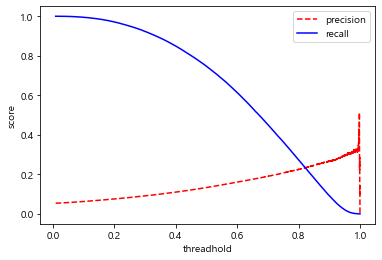

In [167]:
# 예측 확률
proba_lr_1 = lr_clf_1.predict_proba(X_test_1_scaled)
proba_lr_6월_1 = lr_clf_1.predict_proba(test_f_scaled_1)

# precision,recall은 trade off관계, precision_recall_curve( )
precision,recall,th = precision_recall_curve(y_test,proba_lr_1[:,1])

plt.xlabel('threadhold') #임계값
plt.ylabel('score')
plt.plot(th,precision[:len(th)],'red',linestyle = '--',label = 'precision')
plt.plot(th,recall[:len(th)],'blue',label = 'recall')
plt.legend()
plt.show()

In [43]:
# 임계값의 변화에 따른 수치 변화
from sklearn.preprocessing import Binarizer

for i in np.arange(0,1,0.05):
    custom_threshold = i

    proba_lr_1_final = proba_lr_1[:,1].reshape(-1,1)

    binarizer = Binarizer(threshold=custom_threshold).fit(proba_lr_1_final)
    custom_pred = binarizer.transform(proba_lr_1_final)

    recall = recall_score(y_test, custom_pred)
    acc = accuracy_score(y_test, custom_pred)
    f1 = f1_score(y_test, custom_pred)
    precision = precision_score(y_test, custom_pred)
    print(f"임계값 {i}, 정확도:{acc:.4f}, 재현율:{recall}, 정밀도: {precision}, f1:{f1}")

임계값 0.0, 정확도:0.0541, 재현율:1.0, 정밀도: 0.054084546491801264, f1:0.1026189913737094
임계값 0.05, 정확도:0.1144, 재현율:0.9990804041381813, 정밀도: 0.05751043725735205, f1:0.1087602667866201
임계값 0.1, 정확도:0.1979, 재현율:0.9947062738217678, 정밀도: 0.06287693078432198, f1:0.11827736533149172
임계값 0.15000000000000002, 정확도:0.2799, 재현율:0.9859459132433904, 정밀도: 0.0690158840671038, f1:0.1290016927974378
임계값 0.2, 정확도:0.3569, 재현율:0.971062980216589, 정밀도: 0.0756680894475669, f1:0.14039610091983862
임계값 0.25, 정확도:0.4296, 재현율:0.9501603242785407, 정밀도: 0.08300525402561107, f1:0.15267310630161035
임계값 0.30000000000000004, 정확도:0.4982, 재현율:0.9230685461915421, 정밀도: 0.09117452319430534, f1:0.16595693303703993
임계값 0.35000000000000003, 정확도:0.5623, 재현율:0.8898420957105693, 정밀도: 0.10028144968405091, f1:0.18024953706597252
임계값 0.4, 정확도:0.6215, 재현율:0.8492286284711719, 정밀도: 0.11032349843595265, f1:0.19527834004576977
임계값 0.45, 정확도:0.6754, 재현율:0.8010708451811966, 정밀도: 0.12131432016374488, f1:0.21071753674574933
임계값 0.5, 정확도:0.7241, 재현율:0.74

In [168]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 값을 0.7로 설정
custom_threshold = 0.7

#즉 Positive 클래스의 컬럼 하나만 추출하여 Binarizer를 적용
proba_lr_1_final = proba_lr_1[:,1].reshape(-1,1)
proba_lr_6월_1_final = proba_lr_6월_1[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold).fit(proba_lr_1_final)
lr_custom_pred_1 = binarizer.transform(proba_lr_1_final)

proba_lr_6월_custom_1 = binarizer.transform(proba_lr_6월_1_final)

display_eval(y_test, lr_custom_pred_1)

[[2573605  317246]
 [  90657   74633]]
**************************************************

정확도 : 0.87, 정밀도 : 0.19, 재현율 : 0.45
f1-score : 0.27, auc : 0.67


In [94]:
lr_custom_pred_1_list = pd.DataFrame(lr_custom_pred_1).T.values.tolist()
lr_custom_pred_1_df = pd.DataFrame(lr_custom_pred_1_list)
lr_custom_pred_1_df = lr_custom_pred_1_df.transpose()
lr_custom_pred_1_df.columns = ['lr_custom_1']

In [95]:
# test data에 대한 예측값을 담은 csv 파일 저장
lr_custom_pred_1_df.to_csv('custom_pred/lr_custom_pred_1_df.csv', index=False)

In [171]:
proba_lr_6월_custom_1_list = pd.DataFrame(proba_lr_6월_custom_1).T.values.tolist()
proba_lr_6월_custom_1_df = pd.DataFrame(proba_lr_6월_custom_1_list)
proba_lr_6월_custom_1_df = proba_lr_6월_custom_1_df.transpose()
proba_lr_6월_custom_1_df.columns = ['june_lr_1']

In [172]:
# 실제 6월 data에 대한 예측값을 담은 csv 파일 저장
proba_lr_6월_custom_1_df.to_csv('custom_pred/lr_6월_custom_1_df.csv', index=False)

#### 모델 2(real_train_x2_scaled 사용)

In [174]:
# 로지스틱
from sklearn.linear_model import LogisticRegression

lr_clf_2 = LogisticRegression(random_state=42)
lr_clf_2.fit(real_train_x2_scaled, real_train_y2)
lr_preds_2 = lr_clf_2.predict(X_test_2_scaled)
lr_preds_final_2 = lr_clf_2.predict(test_f_scaled_2)

display_eval(y_test, lr_preds_2)

[[2088294  802557]
 [  41777  123513]]
**************************************************

정확도 : 0.72, 정밀도 : 0.13, 재현율 : 0.75
f1-score : 0.23, auc : 0.73


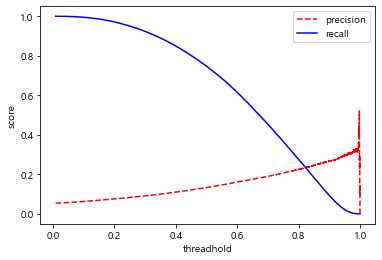

In [175]:
# 예측 확률
proba_lr_2 = lr_clf_2.predict_proba(X_test_2_scaled)
proba_lr_6월_2 = lr_clf_2.predict_proba(test_f_scaled_2)

# precision,recall은 trade off관계, precision_recall_curve( )
precision,recall,th = precision_recall_curve(y_test,proba_lr_2[:,1])

plt.xlabel('threadhold') #임계값
plt.ylabel('score')
plt.plot(th,precision[:len(th)],'red',linestyle = '--',label = 'precision')
plt.plot(th,recall[:len(th)],'blue',label = 'recall')
plt.legend()
plt.show()

In [47]:
from sklearn.preprocessing import Binarizer

for i in np.arange(0,1,0.05):
    custom_threshold = i

    proba_lr_2_final = proba_lr_2[:,1].reshape(-1,1)

    binarizer = Binarizer(threshold=custom_threshold).fit(proba_lr_2_final)
    custom_pred = binarizer.transform(proba_lr_2_final)

    recall = recall_score(y_test, custom_pred)
    acc = accuracy_score(y_test, custom_pred)
    f1 = f1_score(y_test, custom_pred)
    precision = precision_score(y_test, custom_pred)
    print(f"임계값 {i}, 정확도:{acc:.4f}, 재현율:{recall}, 정밀도: {precision}, f1:{f1}")

임계값 0.0, 정확도:0.0541, 재현율:1.0, 정밀도: 0.054084546491801264, f1:0.1026189913737094
임계값 0.05, 정확도:0.1147, 재현율:0.9990562042470809, 정밀도: 0.0575247704446958, f1:0.1087857536473768
임계값 0.1, 정확도:0.1982, 재현율:0.9947062738217678, 정밀도: 0.0628994939424591, f1:0.11831728447745447
임계값 0.15000000000000002, 정확도:0.2802, 재현율:0.9859640631617158, 정밀도: 0.06904481579222752, f1:0.12905238709697853
임계값 0.2, 정확도:0.3572, 재현율:0.9710690301893642, 정밀도: 0.07570574995424866, f1:0.14046098660830314
임계값 0.25, 정확도:0.4299, 재현율:0.9500937745780144, 정밀도: 0.08303744645615208, f1:0.152726699820131
임계값 0.30000000000000004, 정확도:0.4983, 재현율:0.9232137455381451, 정밀도: 0.09120532464381045, f1:0.16601030452302418
임계값 0.35000000000000003, 정확도:0.5623, 재현율:0.8897029463367415, 정밀도: 0.10027308338759772, f1:0.18023316736882422
임계값 0.4, 정확도:0.6213, 재현율:0.8492649283078226, 정밀도: 0.11029613973332496, f1:0.19523643949930458
임계값 0.45, 정확도:0.6752, 재현율:0.8011192449633977, 정밀도: 0.12122934948296461, f1:0.21059101842832437
임계값 0.5, 정확도:0.7237, 재현율:0.74

In [176]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 값을 0.7로 설정
custom_threshold = 0.7

#즉 Positive 클래스의 컬럼 하나만 추출하여 Binarizer를 적용
proba_lr_2_final = proba_lr_2[:,1].reshape(-1,1)
proba_lr_6월_2_final = proba_lr_6월_2[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold).fit(proba_lr_2_final)
lr_custom_pred_2 = binarizer.transform(proba_lr_2_final)

proba_lr_6월_custom_2 = binarizer.transform(proba_lr_6월_2_final)

display_eval(y_test, lr_custom_pred_2)

[[2571864  318987]
 [  90413   74877]]
**************************************************

정확도 : 0.87, 정밀도 : 0.19, 재현율 : 0.45
f1-score : 0.27, auc : 0.67


In [96]:
lr_custom_pred_2_list = pd.DataFrame(lr_custom_pred_2).T.values.tolist()
lr_custom_pred_2_df = pd.DataFrame(lr_custom_pred_2_list)
lr_custom_pred_2_df = lr_custom_pred_2_df.transpose()
lr_custom_pred_2_df.columns = ['lr_custom_2']

In [97]:
lr_custom_pred_2_df.to_csv('custom_pred/lr_custom_pred_2_df.csv', index=False)

In [177]:
proba_lr_6월_custom_2_list = pd.DataFrame(proba_lr_6월_custom_2).T.values.tolist()
proba_lr_6월_custom_2_df = pd.DataFrame(proba_lr_6월_custom_2_list)
proba_lr_6월_custom_2_df = proba_lr_6월_custom_2_df.transpose()
proba_lr_6월_custom_2_df.columns = ['june_lr_2']

In [178]:
proba_lr_6월_custom_2_df.to_csv('custom_pred/lr_6월_custom_2_df.csv', index=False)

#### 모델 3(real_train_x3_scaled 사용)

In [179]:
# 로지스틱
from sklearn.linear_model import LogisticRegression

lr_clf_3 = LogisticRegression(random_state=42)
lr_clf_3.fit(real_train_x3_scaled, real_train_y3)
lr_preds_3 = lr_clf_3.predict(X_test_3_scaled)
lr_preds_final_3 = lr_clf_3.predict(test_f_scaled_3)

display_eval(y_test, lr_preds_3)

[[2088665  802186]
 [  41788  123502]]
**************************************************

정확도 : 0.72, 정밀도 : 0.13, 재현율 : 0.75
f1-score : 0.23, auc : 0.73


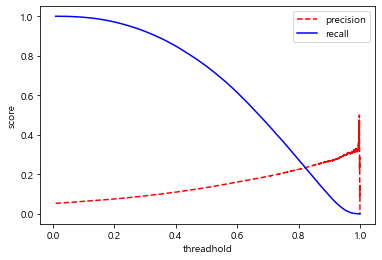

In [180]:
# 예측 확률
proba_lr_3 = lr_clf_3.predict_proba(X_test_3_scaled)
proba_lr_6월_3 = lr_clf_3.predict_proba(test_f_scaled_3)

# precision,recall은 trade off관계, precision_recall_curve( )
precision,recall,th = precision_recall_curve(y_test,proba_lr_3[:,1])

plt.xlabel('threadhold') #임계값
plt.ylabel('score')
plt.plot(th,precision[:len(th)],'red',linestyle = '--',label = 'precision')
plt.plot(th,recall[:len(th)],'blue',label = 'recall')
plt.legend()
plt.show()

In [51]:
from sklearn.preprocessing import Binarizer

for i in np.arange(0,1,0.05):
    custom_threshold = i

    proba_lr_3_final = proba_lr_3[:,1].reshape(-1,1)

    binarizer = Binarizer(threshold=custom_threshold).fit(proba_lr_3_final)
    custom_pred = binarizer.transform(proba_lr_3_final)

    recall = recall_score(y_test, custom_pred)
    acc = accuracy_score(y_test, custom_pred)
    f1 = f1_score(y_test, custom_pred)
    precision = precision_score(y_test, custom_pred)
    print(f"임계값 {i}, 정확도:{acc:.4f}, 재현율:{recall}, 정밀도: {precision}, f1:{f1}")

임계값 0.0, 정확도:0.0541, 재현율:1.0, 정밀도: 0.054084546491801264, f1:0.1026189913737094
임계값 0.05, 정확도:0.1144, 재현율:0.9990864541109565, 정밀도: 0.05751030483362517, f1:0.10876006583336571
임계값 0.1, 정확도:0.1978, 재현율:0.9947304737128683, 정밀도: 0.06287069443823075, f1:0.11826650261842994
임계값 0.15000000000000002, 정확도:0.2798, 재현율:0.9859459132433904, 정밀도: 0.06900550970253026, f1:0.12898356986428655
임계값 0.2, 정확도:0.3567, 재현율:0.9710569302438139, 정밀도: 0.07565263869367624, f1:0.14036944205888474
임계값 0.25, 정확도:0.4295, 재현율:0.9502631738157178, 정밀도: 0.08299660497496665, f1:0.15265980323311942
임계값 0.30000000000000004, 정확도:0.4980, 재현율:0.9232379454292455, 정밀도: 0.09115759065163084, f1:0.16593161880156754
임계값 0.35000000000000003, 정확도:0.5621, 재현율:0.8898118458466937, 정밀도: 0.10024605360015268, f1:0.18019173634720817
임계값 0.4, 정확도:0.6212, 재현율:0.8493859277633251, 정밀도: 0.11028334560056684, f1:0.19521959162333513
임계값 0.45, 정확도:0.6752, 재현율:0.8010103454534454, 정밀도: 0.12121719832345461, f1:0.21056892208254874
임계값 0.5, 정확도:0.7238, 재현율

In [181]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 값을 0.7로 설정
custom_threshold = 0.7

#즉 Positive 클래스의 컬럼 하나만 추출하여 Binarizer를 적용
proba_lr_3_final = proba_lr_3[:,1].reshape(-1,1)
proba_lr_6월_3_final = proba_lr_6월_3[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold).fit(proba_lr_3_final)
lr_custom_pred_3 = binarizer.transform(proba_lr_3_final)

proba_lr_6월_custom_3 = binarizer.transform(proba_lr_6월_3_final)

display_eval(y_test, lr_custom_pred_3)

[[2572949  317902]
 [  90610   74680]]
**************************************************

정확도 : 0.87, 정밀도 : 0.19, 재현율 : 0.45
f1-score : 0.27, auc : 0.67


In [99]:
lr_custom_pred_3_list = pd.DataFrame(lr_custom_pred_3).T.values.tolist()
lr_custom_pred_3_df = pd.DataFrame(lr_custom_pred_3_list)
lr_custom_pred_3_df = lr_custom_pred_3_df.transpose()
lr_custom_pred_3_df.columns = ['lr_custom_3']

In [100]:
lr_custom_pred_3_df.to_csv('custom_pred/lr_custom_pred_3_df.csv', index=False)

In [182]:
proba_lr_6월_custom_3_list = pd.DataFrame(proba_lr_6월_custom_3).T.values.tolist()
proba_lr_6월_custom_3_df = pd.DataFrame(proba_lr_6월_custom_3_list)
proba_lr_6월_custom_3_df = proba_lr_6월_custom_3_df.transpose()
proba_lr_6월_custom_3_df.columns = ['june_lr_3']

In [183]:
proba_lr_6월_custom_3_df.to_csv('custom_pred/lr_6월_custom_3_df.csv', index=False)

#### 모델 4(real_train_x4_scaled 사용)

In [184]:
# 로지스틱
from sklearn.linear_model import LogisticRegression

lr_clf_4 = LogisticRegression(random_state=42)
lr_clf_4.fit(real_train_x4_scaled, real_train_y4)
lr_preds_4 = lr_clf_4.predict(X_test_4_scaled)
lr_preds_final_4 = lr_clf_4.predict(test_f_scaled_4)

display_eval(y_test, lr_preds_4)

[[2089612  801239]
 [  41815  123475]]
**************************************************

정확도 : 0.72, 정밀도 : 0.13, 재현율 : 0.75
f1-score : 0.23, auc : 0.73


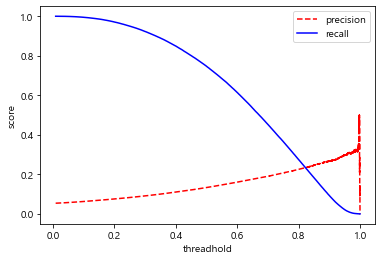

In [185]:
# 예측 확률
proba_lr_4 = lr_clf_4.predict_proba(X_test_4_scaled)
proba_lr_6월_4 = lr_clf_4.predict_proba(test_f_scaled_4)

# precision,recall은 trade off관계, precision_recall_curve( )
precision,recall,th = precision_recall_curve(y_test,proba_lr_4[:,1])

plt.xlabel('threadhold') #임계값
plt.ylabel('score')
plt.plot(th,precision[:len(th)],'red',linestyle = '--',label = 'precision')
plt.plot(th,recall[:len(th)],'blue',label = 'recall')
plt.legend()
plt.show()

In [103]:
from sklearn.preprocessing import Binarizer

for i in np.arange(0,1,0.05):
    custom_threshold = i

    proba_lr_4_final = proba_lr_4[:,1].reshape(-1,1)

    binarizer = Binarizer(threshold=custom_threshold).fit(proba_lr_4_final)
    custom_pred = binarizer.transform(proba_lr_4_final)

    recall = recall_score(y_test, custom_pred)
    acc = accuracy_score(y_test, custom_pred)
    f1 = f1_score(y_test, custom_pred)
    precision = precision_score(y_test, custom_pred)
    print(f"임계값 {i}, 정확도:{acc:.4f}, 재현율:{recall}, 정밀도: {precision}, f1:{f1}")

임계값 0.0, 정확도:0.0541, 재현율:1.0, 정밀도: 0.054084546491801264, f1:0.1026189913737094
임계값 0.05, 정확도:0.1146, 재현율:0.9990622542198561, 정밀도: 0.05751880720619553, f1:0.10877512627360468
임계값 0.1, 정확도:0.1982, 재현율:0.9946881239034424, 정밀도: 0.0629014264267711, f1:0.11832057497875206
임계값 0.15000000000000002, 정확도:0.2803, 재현율:0.9858672635973138, 정밀도: 0.0690470470241432, f1:0.12905545526075177
임계값 0.2, 정확도:0.3573, 재현율:0.9708935809788856, 정밀도: 0.07570835495588998, f1:0.140463634414155
임계값 0.25, 정확도:0.4301, 재현율:0.9499122753947608, 정밀도: 0.08305122579252824, f1:0.15274766006006357
임계값 0.30000000000000004, 정확도:0.4986, 재현율:0.922862847117188, 정밀도: 0.09122681951275524, f1:0.16604023324440265
임계값 0.35000000000000003, 정확도:0.5626, 재현율:0.8896182467178898, 정밀도: 0.10032880035970855, f1:0.18032142574655668
임계값 0.4, 정확도:0.6216, 재현율:0.8491620787706455, 정밀도: 0.11036672532636337, f1:0.19534429295937739
임계값 0.45, 정확도:0.6755, 재현율:0.8007441466513401, 정밀도: 0.12131208244693771, f1:0.21070285492776916
임계값 0.5, 정확도:0.7241, 재현율:0.74

In [186]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 값을 0.7로 설정
custom_threshold = 0.7

#즉 Positive 클래스의 컬럼 하나만 추출하여 Binarizer를 적용
proba_lr_4_final = proba_lr_4[:,1].reshape(-1,1)
proba_lr_6월_4_final = proba_lr_6월_4[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold).fit(proba_lr_4_final)
lr_custom_pred_4 = binarizer.transform(proba_lr_4_final)

proba_lr_6월_custom_4 = binarizer.transform(proba_lr_6월_4_final)

display_eval(y_test, lr_custom_pred_4)

[[2572727  318124]
 [  90512   74778]]
**************************************************

정확도 : 0.87, 정밀도 : 0.19, 재현율 : 0.45
f1-score : 0.27, auc : 0.67


In [105]:
lr_custom_pred_4_list = pd.DataFrame(lr_custom_pred_4).T.values.tolist()
lr_custom_pred_4_df = pd.DataFrame(lr_custom_pred_4_list)
lr_custom_pred_4_df = lr_custom_pred_4_df.transpose()
lr_custom_pred_4_df.columns = ['lr_custom_4']

In [106]:
lr_custom_pred_4_df.to_csv('custom_pred/lr_custom_pred_4_df.csv', index=False)

In [187]:
proba_lr_6월_custom_4_list = pd.DataFrame(proba_lr_6월_custom_4).T.values.tolist()
proba_lr_6월_custom_4_df = pd.DataFrame(proba_lr_6월_custom_4_list)
proba_lr_6월_custom_4_df = proba_lr_6월_custom_4_df.transpose()
proba_lr_6월_custom_4_df.columns = ['june_lr_4']

In [188]:
proba_lr_6월_custom_4_df.to_csv('custom_pred/lr_6월_custom_4_df.csv', index=False)

#### 모델 5(real_train_x5_scaled 사용)

In [189]:
# 로지스틱
from sklearn.linear_model import LogisticRegression

lr_clf_5 = LogisticRegression(random_state=42)
lr_clf_5.fit(real_train_x5_scaled, real_train_y5)
lr_preds_5 = lr_clf_5.predict(X_test_5_scaled)
lr_preds_final_5 = lr_clf_5.predict(test_f_scaled_5)

display_eval(y_test, lr_preds_5)

[[2089072  801779]
 [  41765  123525]]
**************************************************

정확도 : 0.72, 정밀도 : 0.13, 재현율 : 0.75
f1-score : 0.23, auc : 0.73


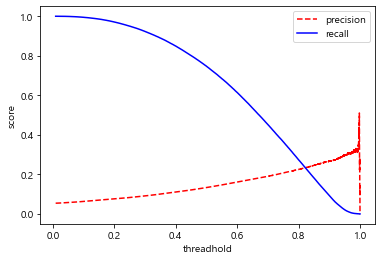

In [191]:
# 예측 확률
proba_lr_5 = lr_clf_5.predict_proba(X_test_5_scaled)
proba_lr_6월_5 = lr_clf_5.predict_proba(test_f_scaled_5)

# precision,recall은 trade off관계, precision_recall_curve( )
precision,recall,th = precision_recall_curve(y_test,proba_lr_5[:,1])

plt.xlabel('threadhold') #임계값
plt.ylabel('score')
plt.plot(th,precision[:len(th)],'red',linestyle = '--',label = 'precision')
plt.plot(th,recall[:len(th)],'blue',label = 'recall')
plt.legend()
plt.show()

In [109]:
from sklearn.preprocessing import Binarizer

for i in np.arange(0,1,0.05):
    custom_threshold = i

    proba_lr_5_final = proba_lr_5[:,1].reshape(-1,1)

    binarizer = Binarizer(threshold=custom_threshold).fit(proba_lr_5_final)
    custom_pred = binarizer.transform(proba_lr_5_final)

    recall = recall_score(y_test, custom_pred)
    acc = accuracy_score(y_test, custom_pred)
    f1 = f1_score(y_test, custom_pred)
    precision = precision_score(y_test, custom_pred)
    print(f"임계값 {i}, 정확도:{acc:.4f}, 재현율:{recall}, 정밀도: {precision}, f1:{f1}")

임계값 0.0, 정확도:0.0541, 재현율:1.0, 정밀도: 0.054084546491801264, f1:0.1026189913737094
임계값 0.05, 정확도:0.1150, 재현율:0.9990501542743058, 정밀도: 0.057541680633967966, f1:0.1088159552540157
임계값 0.1, 정확도:0.1986, 재현율:0.9946881239034424, 정밀도: 0.06292759606187735, f1:0.11836687236569238
임계값 0.15000000000000002, 정확도:0.2805, 재현율:0.985824913787888, 정밀도: 0.06906078987163229, f1:0.12907909735650328
임계값 0.2, 정확도:0.3573, 재현율:0.9709359307883114, 정밀도: 0.07570094339622642, f1:0.14045132127651197
임계값 0.25, 정확도:0.4299, 재현율:0.9500393248230383, 정밀도: 0.08303352178630576, f1:0.15271935804808026
임계값 0.30000000000000004, 정확도:0.4983, 재현율:0.9231532458103938, 정밀도: 0.09120338160439723, f1:0.16600610767746155
임계값 0.35000000000000003, 정확도:0.5623, 재현율:0.8895940468267893, 정밀도: 0.10026224562992136, f1:0.1802134259559985
임계값 0.4, 정확도:0.6214, 재현율:0.8491620787706455, 정밀도: 0.11029136161796496, f1:0.19522623602042144
임계값 0.45, 정확도:0.6753, 재현율:0.8010647952084216, 정밀도: 0.12126140878194597, f1:0.2106375058462694
임계값 0.5, 정확도:0.7240, 재현율:0.

In [192]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 값을 0.7로 설정
custom_threshold = 0.7

#즉 Positive 클래스의 컬럼 하나만 추출하여 Binarizer를 적용
proba_lr_5_final = proba_lr_5[:,1].reshape(-1,1)
proba_lr_6월_5_final = proba_lr_6월_5[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold).fit(proba_lr_5_final)
lr_custom_pred_5 = binarizer.transform(proba_lr_5_final)

proba_lr_6월_custom_5 = binarizer.transform(proba_lr_6월_5_final)

display_eval(y_test, lr_custom_pred_5)

[[2573016  317835]
 [  90600   74690]]
**************************************************

정확도 : 0.87, 정밀도 : 0.19, 재현율 : 0.45
f1-score : 0.27, auc : 0.67


In [111]:
lr_custom_pred_5_list = pd.DataFrame(lr_custom_pred_5).T.values.tolist()
lr_custom_pred_5_df = pd.DataFrame(lr_custom_pred_5_list)
lr_custom_pred_5_df = lr_custom_pred_5_df.transpose()
lr_custom_pred_5_df.columns = ['lr_custom_5']

In [112]:
lr_custom_pred_5_df.to_csv('custom_pred/lr_custom_pred_5_df.csv', index=False)

In [193]:
proba_lr_6월_custom_5_list = pd.DataFrame(proba_lr_6월_custom_5).T.values.tolist()
proba_lr_6월_custom_5_df = pd.DataFrame(proba_lr_6월_custom_5_list)
proba_lr_6월_custom_5_df = proba_lr_6월_custom_5_df.transpose()
proba_lr_6월_custom_5_df.columns = ['june_lr_5']

In [194]:
proba_lr_6월_custom_5_df.to_csv('custom_pred/lr_6월_custom_5_df.csv', index=False)

## LightGBM
5개의 데이터셋에 대하여 각각 훈련

#### 모델 1(real_train_x1_scaled 사용)

In [195]:
# LightGBM
from lightgbm import LGBMClassifier

lgbm_clf_1 = LGBMClassifier(random_state=42)
lgbm_clf_1.fit(real_train_x1_scaled, real_train_y1)
lgbm_preds_1 = lgbm_clf_1.predict(X_test_1_scaled)
lgbm_preds_final_1 = lgbm_clf_1.predict(test_f_scaled_1)

display_eval(y_test, lgbm_preds_1)

[[2182282  708569]
 [  29510  135780]]
**************************************************

정확도 : 0.76, 정밀도 : 0.16, 재현율 : 0.82
f1-score : 0.27, auc : 0.79


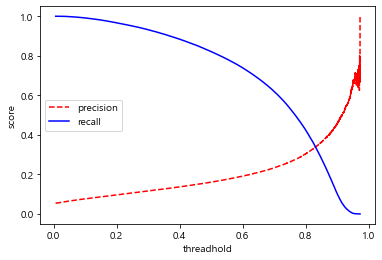

In [196]:
# 예측 확률
proba_lgbm_1 = lgbm_clf_1.predict_proba(X_test_1_scaled)
proba_lgbm_6월_1 = lgbm_clf_1.predict_proba(test_f_scaled_1)

# precision,recall은 trade off관계, precision_recall_curve( )
precision,recall,th = precision_recall_curve(y_test,proba_lgbm_1[:,1])

plt.xlabel('threadhold') #임계값
plt.ylabel('score')
plt.plot(th,precision[:len(th)],'red',linestyle = '--',label = 'precision')
plt.plot(th,recall[:len(th)],'blue',label = 'recall')
plt.legend()
plt.show()

In [197]:
from sklearn.preprocessing import Binarizer

for i in np.arange(0,1,0.05):
    custom_threshold = i

    proba_lgbm_1_final = proba_lgbm_1[:,1].reshape(-1,1)

    binarizer = Binarizer(threshold=custom_threshold).fit(proba_lgbm_1_final)
    custom_pred = binarizer.transform(proba_lgbm_1_final)

    recall = recall_score(y_test, custom_pred)
    acc = accuracy_score(y_test, custom_pred)
    f1 = f1_score(y_test, custom_pred)
    precision = precision_score(y_test, custom_pred)
    print(f"임계값 {i}, 정확도:{acc:.4f}, 재현율:{recall}, 정밀도: {precision}, f1:{f1}")

임계값 0.0, 정확도:0.0541, 재현율:1.0, 정밀도: 0.054084546491801264, f1:0.1026189913737094
임계값 0.05, 정확도:0.2265, 재현율:0.9981003085486115, 정밀도: 0.06524111879881932, f1:0.12247652377392443
임계값 0.1, 정확도:0.3504, 재현율:0.9913485389315748, 정밀도: 0.07629688642957484, f1:0.14168900103028467
임계값 0.15000000000000002, 정확도:0.4387, 재현율:0.9809183858672635, 정밀도: 0.08649799834404583, f1:0.15897728041542591
임계값 0.2, 정확도:0.5076, 재현율:0.9667372496823764, 정밀도: 0.09630694403008688, f1:0.17516395037503735
임계값 0.25, 정확도:0.5636, 재현율:0.9507592715832779, 정밀도: 0.10599503853298134, f1:0.1907269545292357
임계값 0.30000000000000004, 정확도:0.6118, 재현율:0.9318773065521205, 정밀도: 0.11589202171122624, f1:0.20614679611234688
임계값 0.35000000000000003, 정확도:0.6544, 재현율:0.9096436566035453, 정밀도: 0.12616691071271235, f1:0.22159829919565513
임계값 0.4, 정확도:0.6921, 재현율:0.8839675721459254, 정밀도: 0.1368329078503024, f1:0.236982359848706
임계값 0.45, 정확도:0.7265, 재현율:0.8549337527981125, 정밀도: 0.14826410382851926, f1:0.2527038626609442
임계값 0.5, 정확도:0.7585, 재현율:0.82

In [198]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 값을 0.8로 설정
custom_threshold = 0.8

#즉 Positive 클래스의 컬럼 하나만 추출하여 Binarizer를 적용
proba_lgbm_1_final = proba_lgbm_1[:,1].reshape(-1,1)
proba_lgbm_6월_1_final = proba_lgbm_6월_1[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold).fit(proba_lgbm_1_final)
lgbm_custom_pred_1 = binarizer.transform(proba_lgbm_1_final)

proba_lgbm_6월_custom_1 = binarizer.transform(proba_lgbm_6월_1_final)

display_eval(y_test, lgbm_custom_pred_1)

[[2729779  161072]
 [  94993   70297]]
**************************************************

정확도 : 0.92, 정밀도 : 0.30, 재현율 : 0.43
f1-score : 0.35, auc : 0.68


In [199]:
lgbm_custom_pred_1_list = pd.DataFrame(lgbm_custom_pred_1).T.values.tolist()
lgbm_custom_pred_1_df = pd.DataFrame(lgbm_custom_pred_1_list)
lgbm_custom_pred_1_df = lgbm_custom_pred_1_df.transpose()
lgbm_custom_pred_1_df.columns = ['lgbm_custom_1']

In [200]:
lgbm_custom_pred_1_df.to_csv('custom_pred/lgbm_custom_pred_1_df.csv', index=False)

In [201]:
proba_lgbm_6월_custom_1_list = pd.DataFrame(proba_lgbm_6월_custom_1).T.values.tolist()
proba_lgbm_6월_custom_1_df = pd.DataFrame(proba_lgbm_6월_custom_1_list)
proba_lgbm_6월_custom_1_df = proba_lgbm_6월_custom_1_df.transpose()
proba_lgbm_6월_custom_1_df.columns = ['june_lgbm_1']

In [202]:
proba_lgbm_6월_custom_1_df.to_csv('custom_pred/lgbm_6월_custom_1_df.csv', index=False)

#### 모델 2(real_train_x2_scaled 사용)

In [203]:
# LightGBM
from lightgbm import LGBMClassifier

lgbm_clf_2 = LGBMClassifier(random_state=42)
lgbm_clf_2.fit(real_train_x2_scaled, real_train_y2)
lgbm_preds_2 = lgbm_clf_2.predict(X_test_2_scaled)
lgbm_preds_final_2 = lgbm_clf_2.predict(test_f_scaled_2)

display_eval(y_test, lgbm_preds_2)

[[2183825  707026]
 [  29447  135843]]
**************************************************

정확도 : 0.76, 정밀도 : 0.16, 재현율 : 0.82
f1-score : 0.27, auc : 0.79


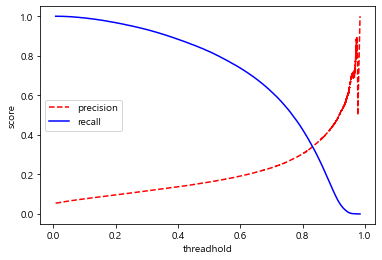

In [204]:
# 예측 확률
proba_lgbm_2 = lgbm_clf_2.predict_proba(X_test_2_scaled)
proba_lgbm_6월_2 = lgbm_clf_2.predict_proba(test_f_scaled_2)

# precision,recall은 trade off관계, precision_recall_curve( )
precision,recall,th = precision_recall_curve(y_test,proba_lgbm_2[:,1])

plt.xlabel('threadhold') #임계값
plt.ylabel('score')
plt.plot(th,precision[:len(th)],'red',linestyle = '--',label = 'precision')
plt.plot(th,recall[:len(th)],'blue',label = 'recall')
plt.legend()
plt.show()

In [205]:
from sklearn.preprocessing import Binarizer

for i in np.arange(0,1,0.05):
    custom_threshold = i

    proba_lgbm_2_final = proba_lgbm_2[:,1].reshape(-1,1)

    binarizer = Binarizer(threshold=custom_threshold).fit(proba_lgbm_2_final)
    custom_pred = binarizer.transform(proba_lgbm_2_final)

    recall = recall_score(y_test, custom_pred)
    acc = accuracy_score(y_test, custom_pred)
    f1 = f1_score(y_test, custom_pred)
    precision = precision_score(y_test, custom_pred)
    print(f"임계값 {i}, 정확도:{acc:.4f}, 재현율:{recall}, 정밀도: {precision}, f1:{f1}")

임계값 0.0, 정확도:0.0541, 재현율:1.0, 정밀도: 0.054084546491801264, f1:0.1026189913737094
임계값 0.05, 정확도:0.2261, 재현율:0.9981366083852623, 정밀도: 0.06521321514091939, f1:0.12242762624778492
임계값 0.1, 정확도:0.3493, 재현율:0.9914029886865509, 정밀도: 0.07617718101337141, f1:0.14148311680911188
임계값 0.15000000000000002, 정확도:0.4372, 재현율:0.9810575352410914, 정밀도: 0.08630096743257296, f1:0.1586462546299829
임계값 0.2, 정확도:0.5063, 재현율:0.9675176961703672, 정밀도: 0.09613600827659008, f1:0.17489393184625573
임계값 0.25, 정확도:0.5633, 재현율:0.9514792183435175, 정밀도: 0.10597608917436088, f1:0.19071074829140047
임계값 0.30000000000000004, 정확도:0.6117, 재현율:0.9325730534212596, 정밀도: 0.11591392237914369, f1:0.20619846125343033
임계값 0.35000000000000003, 정확도:0.6545, 재현율:0.9099461552423014, 정밀도: 0.12625611847534016, f1:0.2217448706617257
임계값 0.4, 정확도:0.6925, 재현율:0.8835198741605663, 정밀도: 0.13694340981466685, f1:0.23713194998108295
임계값 0.45, 정확도:0.7271, 재현율:0.8545647044588299, 정밀도: 0.1485106459037111, f1:0.2530457082408118
임계값 0.5, 정확도:0.7590, 재현율:0.8

In [206]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 값을 0.8로 설정
custom_threshold = 0.8

#즉 Positive 클래스의 컬럼 하나만 추출하여 Binarizer를 적용
proba_lgbm_2_final = proba_lgbm_2[:,1].reshape(-1,1)
proba_lgbm_6월_2_final = proba_lgbm_6월_2[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold).fit(proba_lgbm_2_final)
lgbm_custom_pred_2 = binarizer.transform(proba_lgbm_2_final)

proba_lgbm_6월_custom_2 = binarizer.transform(proba_lgbm_6월_2_final)

display_eval(y_test, lgbm_custom_pred_2)

[[2729426  161425]
 [  94676   70614]]
**************************************************

정확도 : 0.92, 정밀도 : 0.30, 재현율 : 0.43
f1-score : 0.36, auc : 0.69


In [207]:
lgbm_custom_pred_2_list = pd.DataFrame(lgbm_custom_pred_2).T.values.tolist()
lgbm_custom_pred_2_df = pd.DataFrame(lgbm_custom_pred_2_list)
lgbm_custom_pred_2_df = lgbm_custom_pred_2_df.transpose()
lgbm_custom_pred_2_df.columns = ['lgbm_custom_2']

In [208]:
lgbm_custom_pred_2_df.to_csv('custom_pred/lgbm_custom_pred_2_df.csv', index=False)

In [209]:
proba_lgbm_6월_custom_2_list = pd.DataFrame(proba_lgbm_6월_custom_2).T.values.tolist()
proba_lgbm_6월_custom_2_df = pd.DataFrame(proba_lgbm_6월_custom_2_list)
proba_lgbm_6월_custom_2_df = proba_lgbm_6월_custom_2_df.transpose()
proba_lgbm_6월_custom_2_df.columns = ['june_lgbm_2']

In [210]:
proba_lgbm_6월_custom_2_df.to_csv('custom_pred/lgbm_6월_custom_2_df.csv', index=False)

#### 모델 3(real_train_x3_scaled 사용)

In [211]:
# LightGBM
from lightgbm import LGBMClassifier

lgbm_clf_3 = LGBMClassifier(random_state=42)
lgbm_clf_3.fit(real_train_x3_scaled, real_train_y3)
lgbm_preds_3 = lgbm_clf_3.predict(X_test_3_scaled)
lgbm_preds_final_3 = lgbm_clf_3.predict(test_f_scaled_3)

display_eval(y_test, lgbm_preds_3)

[[2181852  708999]
 [  29494  135796]]
**************************************************

정확도 : 0.76, 정밀도 : 0.16, 재현율 : 0.82
f1-score : 0.27, auc : 0.79


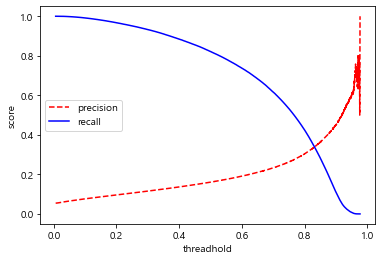

In [212]:
# 예측 확률
proba_lgbm_3 = lgbm_clf_3.predict_proba(X_test_3_scaled)
proba_lgbm_6월_3 = lgbm_clf_3.predict_proba(test_f_scaled_3)

# precision,recall은 trade off관계, precision_recall_curve( )
precision,recall,th = precision_recall_curve(y_test,proba_lgbm_3[:,1])

plt.xlabel('threadhold') #임계값
plt.ylabel('score')
plt.plot(th,precision[:len(th)],'red',linestyle = '--',label = 'precision')
plt.plot(th,recall[:len(th)],'blue',label = 'recall')
plt.legend()
plt.show()

In [213]:
from sklearn.preprocessing import Binarizer

for i in np.arange(0,1,0.05):
    custom_threshold = i

    proba_lgbm_3_final = proba_lgbm_3[:,1].reshape(-1,1)

    binarizer = Binarizer(threshold=custom_threshold).fit(proba_lgbm_3_final)
    custom_pred = binarizer.transform(proba_lgbm_3_final)

    recall = recall_score(y_test, custom_pred)
    acc = accuracy_score(y_test, custom_pred)
    f1 = f1_score(y_test, custom_pred)
    precision = precision_score(y_test, custom_pred)
    print(f"임계값 {i}, 정확도:{acc:.4f}, 재현율:{recall}, 정밀도: {precision}, f1:{f1}")

임계값 0.0, 정확도:0.0541, 재현율:1.0, 정밀도: 0.054084546491801264, f1:0.1026189913737094
임계값 0.05, 정확도:0.2274, 재현율:0.9980761086575111, 정밀도: 0.06531167468157134, f1:0.12260066014939754
임계값 0.1, 정확도:0.3508, 재현율:0.9913243390404743, 정밀도: 0.07633255644838575, f1:0.14175025963526922
임계값 0.15000000000000002, 정확도:0.4378, 재현율:0.9807308367112348, 정밀도: 0.08635670130772297, f1:0.15873614284049617
임계값 0.2, 정확도:0.5065, 재현율:0.9671002480488837, 정밀도: 0.09614330917701515, f1:0.1748991894123034
임계값 0.25, 정확도:0.5621, 재현율:0.951158569786436, 정밀도: 0.10569757224407583, f1:0.19025323816052758
임계값 0.30000000000000004, 정확도:0.6102, 재현율:0.9324520539657571, 정밀도: 0.1155076679104897, f1:0.20555248440101706
임계값 0.35000000000000003, 정확도:0.6530, 재현율:0.91036965333656, 정밀도: 0.12580543486167045, f1:0.22106196419376473
임계값 0.4, 정확도:0.6913, 재현율:0.8842821707302317, 정밀도: 0.1365580527983736, f1:0.2365812956347633
임계값 0.45, 정확도:0.7261, 재현율:0.8552241514913183, 정밀도: 0.14811415351441065, f1:0.2524986849026828
임계값 0.5, 정확도:0.7584, 재현율:0.82156

In [214]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 값을 0.8로 설정
custom_threshold = 0.8

#즉 Positive 클래스의 컬럼 하나만 추출하여 Binarizer를 적용
proba_lgbm_3_final = proba_lgbm_3[:,1].reshape(-1,1)
proba_lgbm_6월_3_final = proba_lgbm_6월_3[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold).fit(proba_lgbm_3_final)
lgbm_custom_pred_3 = binarizer.transform(proba_lgbm_3_final)

proba_lgbm_6월_custom_3 = binarizer.transform(proba_lgbm_6월_3_final)

display_eval(y_test, lgbm_custom_pred_3)

[[2730034  160817]
 [  95103   70187]]
**************************************************

정확도 : 0.92, 정밀도 : 0.30, 재현율 : 0.42
f1-score : 0.35, auc : 0.68


In [215]:
lgbm_custom_pred_3_list = pd.DataFrame(lgbm_custom_pred_3).T.values.tolist()
lgbm_custom_pred_3_df = pd.DataFrame(lgbm_custom_pred_3_list)
lgbm_custom_pred_3_df = lgbm_custom_pred_3_df.transpose()
lgbm_custom_pred_3_df.columns = ['lgbm_custom_3']

In [216]:
lgbm_custom_pred_3_df.to_csv('custom_pred/lgbm_custom_pred_3_df.csv', index=False)

In [217]:
proba_lgbm_6월_custom_3_list = pd.DataFrame(proba_lgbm_6월_custom_3).T.values.tolist()
proba_lgbm_6월_custom_3_df = pd.DataFrame(proba_lgbm_6월_custom_3_list)
proba_lgbm_6월_custom_3_df = proba_lgbm_6월_custom_3_df.transpose()
proba_lgbm_6월_custom_3_df.columns = ['june_lgbm_3']

In [218]:
proba_lgbm_6월_custom_3_df.to_csv('custom_pred/lgbm_6월_custom_3_df.csv', index=False)

#### 모델 4(real_train_x4_scaled 사용)

In [219]:
# LightGBM
from lightgbm import LGBMClassifier

lgbm_clf_4 = LGBMClassifier(random_state=42)
lgbm_clf_4.fit(real_train_x4_scaled, real_train_y4)
lgbm_preds_4 = lgbm_clf_4.predict(X_test_4_scaled)
lgbm_preds_final_4 = lgbm_clf_4.predict(test_f_scaled_4)

display_eval(y_test, lgbm_preds_4)

[[2184093  706758]
 [  29599  135691]]
**************************************************

정확도 : 0.76, 정밀도 : 0.16, 재현율 : 0.82
f1-score : 0.27, auc : 0.79


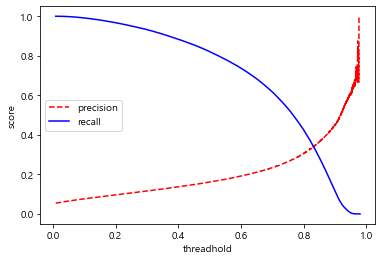

In [220]:
# 예측 확률
proba_lgbm_4 = lgbm_clf_4.predict_proba(X_test_4_scaled)
proba_lgbm_6월_4 = lgbm_clf_4.predict_proba(test_f_scaled_4)

# precision,recall은 trade off관계, precision_recall_curve( )
precision,recall,th = precision_recall_curve(y_test,proba_lgbm_4[:,1])

plt.xlabel('threadhold') #임계값
plt.ylabel('score')
plt.plot(th,precision[:len(th)],'red',linestyle = '--',label = 'precision')
plt.plot(th,recall[:len(th)],'blue',label = 'recall')
plt.legend()
plt.show()

In [221]:
from sklearn.preprocessing import Binarizer

for i in np.arange(0,1,0.05):
    custom_threshold = i

    proba_lgbm_4_final = proba_lgbm_4[:,1].reshape(-1,1)

    binarizer = Binarizer(threshold=custom_threshold).fit(proba_lgbm_4_final)
    custom_pred = binarizer.transform(proba_lgbm_4_final)

    recall = recall_score(y_test, custom_pred)
    acc = accuracy_score(y_test, custom_pred)
    f1 = f1_score(y_test, custom_pred)
    precision = precision_score(y_test, custom_pred)
    print(f"임계값 {i}, 정확도:{acc:.4f}, 재현율:{recall}, 정밀도: {precision}, f1:{f1}")

임계값 0.0, 정확도:0.0541, 재현율:1.0, 정밀도: 0.054084546491801264, f1:0.1026189913737094
임계값 0.05, 정확도:0.2244, 재현율:0.9981366083852623, 정밀도: 0.06508201623204231, f1:0.12219639770156829
임계값 0.1, 정확도:0.3494, 재현율:0.9912275394760723, 정밀도: 0.07617988384241589, f1:0.14148599151377664
임계값 0.15000000000000002, 정확도:0.4377, 재현율:0.9809062859217134, 정밀도: 0.08636308675033412, f1:0.1587492283282003
임계값 0.2, 정확도:0.5068, 재현율:0.9671788976949603, 정밀도: 0.0962126409802718, f1:0.1750151899149912
임계값 0.25, 정확도:0.5633, 재현율:0.9507350716921774, 정밀도: 0.10592611116690809, f1:0.19061487358105048
임계값 0.30000000000000004, 정확도:0.6117, 재현율:0.9322524048641782, 정밀도: 0.11589489644881407, f1:0.20616051921432843
임계값 0.35000000000000003, 정확도:0.6542, 재현율:0.9096134067396696, 정밀도: 0.12612472044520726, f1:0.2215323229435877
임계값 0.4, 정확도:0.6923, 재현율:0.8834533244600399, 정밀도: 0.13683519074334194, f1:0.23696729378793743
임계값 0.45, 정확도:0.7271, 재현율:0.8547704035331841, 정밀도: 0.14850876326262039, f1:0.2530519913168698
임계값 0.5, 정확도:0.7591, 재현율:0.82

In [222]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 값을 0.8로 설정
custom_threshold = 0.8

#즉 Positive 클래스의 컬럼 하나만 추출하여 Binarizer를 적용
proba_lgbm_4_final = proba_lgbm_4[:,1].reshape(-1,1)
proba_lgbm_6월_4_final = proba_lgbm_6월_4[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold).fit(proba_lgbm_4_final)
lgbm_custom_pred_4 = binarizer.transform(proba_lgbm_4_final)

proba_lgbm_6월_custom_4 = binarizer.transform(proba_lgbm_6월_4_final)

display_eval(y_test, lgbm_custom_pred_4)

[[2731791  159060]
 [  95177   70113]]
**************************************************

정확도 : 0.92, 정밀도 : 0.31, 재현율 : 0.42
f1-score : 0.36, auc : 0.68


In [223]:
lgbm_custom_pred_4_list = pd.DataFrame(lgbm_custom_pred_4).T.values.tolist()
lgbm_custom_pred_4_df = pd.DataFrame(lgbm_custom_pred_4_list)
lgbm_custom_pred_4_df = lgbm_custom_pred_4_df.transpose()
lgbm_custom_pred_4_df.columns = ['lgbm_custom_4']

In [224]:
lgbm_custom_pred_4_df.to_csv('custom_pred/lgbm_custom_pred_4_df.csv', index=False)

In [225]:
proba_lgbm_6월_custom_4_list = pd.DataFrame(proba_lgbm_6월_custom_4).T.values.tolist()
proba_lgbm_6월_custom_4_df = pd.DataFrame(proba_lgbm_6월_custom_4_list)
proba_lgbm_6월_custom_4_df = proba_lgbm_6월_custom_4_df.transpose()
proba_lgbm_6월_custom_4_df.columns = ['june_lgbm_4']

In [226]:
proba_lgbm_6월_custom_4_df.to_csv('custom_pred/lgbm_6월_custom_4_df.csv', index=False)

#### 모델 5(real_train_x5_scaled 사용)

In [227]:
# LightGBM
from lightgbm import LGBMClassifier

lgbm_clf_5 = LGBMClassifier(random_state=42)
lgbm_clf_5.fit(real_train_x5_scaled, real_train_y5)
lgbm_preds_5 = lgbm_clf_5.predict(X_test_5_scaled)
lgbm_preds_final_5 = lgbm_clf_5.predict(test_f_scaled_5)

display_eval(y_test, lgbm_preds_5)

[[2180934  709917]
 [  29379  135911]]
**************************************************

정확도 : 0.76, 정밀도 : 0.16, 재현율 : 0.82
f1-score : 0.27, auc : 0.79


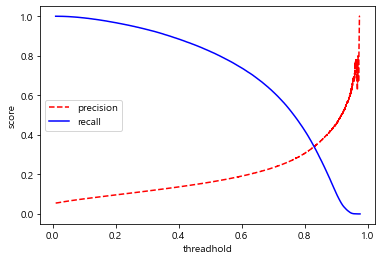

In [228]:
# 예측 확률
proba_lgbm_5 = lgbm_clf_5.predict_proba(X_test_5_scaled)
proba_lgbm_6월_5 = lgbm_clf_5.predict_proba(test_f_scaled_5)

# precision,recall은 trade off관계, precision_recall_curve( )
precision,recall,th = precision_recall_curve(y_test,proba_lgbm_5[:,1])

plt.xlabel('threadhold') #임계값
plt.ylabel('score')
plt.plot(th,precision[:len(th)],'red',linestyle = '--',label = 'precision')
plt.plot(th,recall[:len(th)],'blue',label = 'recall')
plt.legend()
plt.show()

In [229]:
from sklearn.preprocessing import Binarizer

for i in np.arange(0,1,0.05):
    custom_threshold = i

    proba_lgbm_5_final = proba_lgbm_5[:,1].reshape(-1,1)

    binarizer = Binarizer(threshold=custom_threshold).fit(proba_lgbm_5_final)
    custom_pred = binarizer.transform(proba_lgbm_5_final)

    recall = recall_score(y_test, custom_pred)
    acc = accuracy_score(y_test, custom_pred)
    f1 = f1_score(y_test, custom_pred)
    precision = precision_score(y_test, custom_pred)
    print(f"임계값 {i}, 정확도:{acc:.4f}, 재현율:{recall}, 정밀도: {precision}, f1:{f1}")

임계값 0.0, 정확도:0.0541, 재현율:1.0, 정밀도: 0.054084546491801264, f1:0.1026189913737094
임계값 0.05, 정확도:0.2265, 재현율:0.9982092080585637, 정밀도: 0.06525156579791923, f1:0.12249575239812716
임계값 0.1, 정확도:0.3505, 재현율:0.9914755883598524, 정밀도: 0.07630954254598893, f1:0.14171212241749653
임계값 0.15000000000000002, 정확도:0.4379, 재현율:0.9808639361122875, 정밀도: 0.08637955708146458, f1:0.15877649833219407
임계값 0.2, 정확도:0.5067, 재현율:0.9673361969871136, 정밀도: 0.09619465262390346, f1:0.17498800241429185
임계값 0.25, 정확도:0.5627, 재현율:0.9513037691330389, 정밀도: 0.1058472777012627, f1:0.190498632208166
임계값 0.30000000000000004, 정확도:0.6106, 재현율:0.9325609534757093, 정밀도: 0.11562843891143051, f1:0.2057463432149009
임계값 0.35000000000000003, 정확도:0.6533, 재현율:0.9106782019480912, 정밀도: 0.12593145994188912, f1:0.2212656117819389
임계값 0.4, 정확도:0.6915, 재현율:0.8847298687155908, 정밀도: 0.13665157525382074, f1:0.23673766729937226
임계값 0.45, 정확도:0.7261, 재현율:0.8557444491499788, 정밀도: 0.14814636373919637, f1:0.25256816140535077
임계값 0.5, 정확도:0.7581, 재현율:0.82

In [230]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 값을 0.8로 설정
custom_threshold = 0.8

#즉 Positive 클래스의 컬럼 하나만 추출하여 Binarizer를 적용
proba_lgbm_5_final = proba_lgbm_5[:,1].reshape(-1,1)
proba_lgbm_6월_5_final = proba_lgbm_6월_5[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold).fit(proba_lgbm_5_final)
lgbm_custom_pred_5 = binarizer.transform(proba_lgbm_5_final)

proba_lgbm_6월_custom_5 = binarizer.transform(proba_lgbm_6월_5_final)

display_eval(y_test, lgbm_custom_pred_5)

[[2732520  158331]
 [  95423   69867]]
**************************************************

정확도 : 0.92, 정밀도 : 0.31, 재현율 : 0.42
f1-score : 0.36, auc : 0.68


In [231]:
lgbm_custom_pred_5_list = pd.DataFrame(lgbm_custom_pred_5).T.values.tolist()
lgbm_custom_pred_5_df = pd.DataFrame(lgbm_custom_pred_5_list)
lgbm_custom_pred_5_df = lgbm_custom_pred_5_df.transpose()
lgbm_custom_pred_5_df.columns = ['lgbm_custom_5']

In [232]:
lgbm_custom_pred_5_df.to_csv('custom_pred/lgbm_custom_pred_5_df.csv', index=False)

In [233]:
proba_lgbm_6월_custom_5_list = pd.DataFrame(proba_lgbm_6월_custom_5).T.values.tolist()
proba_lgbm_6월_custom_5_df = pd.DataFrame(proba_lgbm_6월_custom_5_list)
proba_lgbm_6월_custom_5_df = proba_lgbm_6월_custom_5_df.transpose()
proba_lgbm_6월_custom_5_df.columns = ['june_lgbm_5']

In [234]:
proba_lgbm_6월_custom_5_df.to_csv('custom_pred/lgbm_6월_custom_5_df.csv', index=False)

## RandomForest
5개의 데이터셋에 대하여 각각 훈련

#### 모델 1(real_train_x1_scaled 사용)

In [235]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier

rf_clf_1 = RandomForestClassifier(random_state=42)
rf_clf_1.fit(real_train_x1_scaled, real_train_y1)
rf_preds_1 = rf_clf_1.predict(X_test_1_scaled)
rf_preds_final_1 = rf_clf_1.predict(test_f_scaled_1)

display_eval(y_test, rf_preds_1)

[[2248749  642102]
 [  26499  138791]]
**************************************************

정확도 : 0.78, 정밀도 : 0.18, 재현율 : 0.84
f1-score : 0.29, auc : 0.81


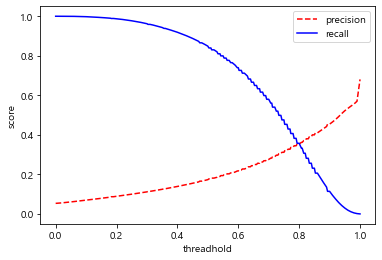

In [236]:
# 예측 확률
proba_rf_1 = rf_clf_1.predict_proba(X_test_1_scaled)
proba_rf_6월_1 = rf_clf_1.predict_proba(test_f_scaled_1)

# precision,recall은 trade off관계, precision_recall_curve( )
precision,recall,th = precision_recall_curve(y_test,proba_rf_1[:,1])

plt.xlabel('threadhold') #임계값
plt.ylabel('score')
plt.plot(th,precision[:len(th)],'red',linestyle = '--',label = 'precision')
plt.plot(th,recall[:len(th)],'blue',label = 'recall')
plt.legend()
plt.show()

In [237]:
from sklearn.preprocessing import Binarizer

for i in np.arange(0,1,0.05):
    custom_threshold = i

    proba_rf_1_final = proba_rf_1[:,1].reshape(-1,1)

    binarizer = Binarizer(threshold=custom_threshold).fit(proba_rf_1_final)
    custom_pred = binarizer.transform(proba_rf_1_final)

    recall = recall_score(y_test, custom_pred)
    acc = accuracy_score(y_test, custom_pred)
    f1 = f1_score(y_test, custom_pred)
    precision = precision_score(y_test, custom_pred)
    print(f"임계값 {i}, 정확도:{acc:.4f}, 재현율:{recall}, 정밀도: {precision}, f1:{f1}")

임계값 0.0, 정확도:0.0728, 재현율:0.9999818500816746, 정밀도: 0.055114901767383484, f1:0.10447174885114702
임계값 0.05, 정확도:0.1968, 재현율:0.9993829027769375, 정밀도: 0.06305183909467471, f1:0.1186198596421183
임계값 0.1, 정확도:0.3058, 재현율:0.9970234133946397, 정밀도: 0.07209380357612354, f1:0.13446460123377665
임계값 0.15000000000000002, 정확도:0.3955, 재현율:0.9924072841672212, 정밀도: 0.08160445903061654, f1:0.15080814539583978
임계값 0.2, 정확도:0.4717, 재현율:0.9854437655030552, 정밀도: 0.09176992501621202, f1:0.16790373398302347
임계값 0.25, 정확도:0.5385, 재현율:0.9744388650251073, 정밀도: 0.10276419838629615, f1:0.18592117353181545
임계값 0.30000000000000004, 정확도:0.5974, 재현율:0.9588541351563918, 정밀도: 0.11468073128693013, f1:0.20485984545903424
임계값 0.35000000000000003, 정확도:0.6503, 재현율:0.9385262266319802, 정밀도: 0.12781536727483653, f1:0.2249899563882447
임계값 0.4, 정확도:0.6984, 재현율:0.9131768407042168, 정밀도: 0.14262914098777052, f1:0.2467226566586463
임계값 0.45, 정확도:0.7418, 재현율:0.8805311876096558, 정밀도: 0.15908390371654488, f1:0.26948115670467304
임계값 0.5, 정확

In [238]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 값을 0.7로 설정
custom_threshold = 0.7

#즉 Positive 클래스의 컬럼 하나만 추출하여 Binarizer를 적용
proba_rf_1_final = proba_rf_1[:,1].reshape(-1,1)
proba_rf_6월_1_final = proba_rf_6월_1[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold).fit(proba_rf_1_final)
rf_custom_pred_1 = binarizer.transform(proba_rf_1_final)

proba_rf_6월_custom_1 = binarizer.transform(proba_rf_6월_1_final)

display_eval(y_test, rf_custom_pred_1)

[[2655783  235068]
 [  72599   92691]]
**************************************************

정확도 : 0.90, 정밀도 : 0.28, 재현율 : 0.56
f1-score : 0.38, auc : 0.74


In [239]:
rf_custom_pred_1_list = pd.DataFrame(rf_custom_pred_1).T.values.tolist()
rf_custom_pred_1_df = pd.DataFrame(rf_custom_pred_1_list)
rf_custom_pred_1_df = rf_custom_pred_1_df.transpose()
rf_custom_pred_1_df.columns = ['rf_custom_1']

In [240]:
rf_custom_pred_1_df.to_csv('custom_pred/rf_custom_pred_1_df.csv', index=False)

In [241]:
proba_rf_6월_custom_1_list = pd.DataFrame(proba_rf_6월_custom_1).T.values.tolist()
proba_rf_6월_custom_1_df = pd.DataFrame(proba_rf_6월_custom_1_list)
proba_rf_6월_custom_1_df = proba_rf_6월_custom_1_df.transpose()
proba_rf_6월_custom_1_df.columns = ['june_rf_1']

In [242]:
proba_rf_6월_custom_1_df.to_csv('custom_pred/rf_6월_custom_1_df.csv', index=False)

#### 모델 2(real_train_x2_scaled 사용)

In [243]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier

rf_clf_2 = RandomForestClassifier(random_state=42)
rf_clf_2.fit(real_train_x2_scaled, real_train_y2)
rf_preds_2 = rf_clf_2.predict(X_test_2_scaled)
rf_preds_final_2 = rf_clf_2.predict(test_f_scaled_2)

display_eval(y_test, rf_preds_2)

[[2247478  643373]
 [  26487  138803]]
**************************************************

정확도 : 0.78, 정밀도 : 0.18, 재현율 : 0.84
f1-score : 0.29, auc : 0.81


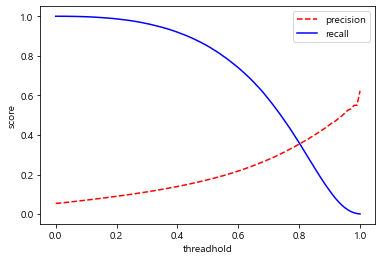

In [244]:
# 예측 확률
proba_rf_2 = rf_clf_2.predict_proba(X_test_2_scaled)
proba_rf_6월_2 = rf_clf_2.predict_proba(test_f_scaled_2)

# precision,recall은 trade off관계, precision_recall_curve( )
precision,recall,th = precision_recall_curve(y_test,proba_rf_2[:,1])

plt.xlabel('threadhold') #임계값
plt.ylabel('score')
plt.plot(th,precision[:len(th)],'red',linestyle = '--',label = 'precision')
plt.plot(th,recall[:len(th)],'blue',label = 'recall')
plt.legend()
plt.show()

In [245]:
from sklearn.preprocessing import Binarizer

for i in np.arange(0,1,0.05):
    custom_threshold = i

    proba_rf_2_final = proba_rf_2[:,1].reshape(-1,1)

    binarizer = Binarizer(threshold=custom_threshold).fit(proba_rf_2_final)
    custom_pred = binarizer.transform(proba_rf_2_final)

    recall = recall_score(y_test, custom_pred)
    acc = accuracy_score(y_test, custom_pred)
    f1 = f1_score(y_test, custom_pred)
    precision = precision_score(y_test, custom_pred)
    print(f"임계값 {i}, 정확도:{acc:.4f}, 재현율:{recall}, 정밀도: {precision}, f1:{f1}")

임계값 0.0, 정확도:0.0746, 재현율:0.9999879000544497, 정밀도: 0.055214969855047674, f1:0.10465153826136674
임계값 0.05, 정확도:0.1996, 재현율:0.9991469538387078, 정밀도: 0.06324669077829709, f1:0.11896294514129054
임계값 0.1, 정확도:0.3076, 재현율:0.9968661141024865, 정밀도: 0.07225748735388723, f1:0.13474782622917975
임계값 0.15000000000000002, 정확도:0.3966, 재현율:0.9920261358823885, 정밀도: 0.08171552162342646, f1:0.15099336528677526
임계값 0.2, 정확도:0.4722, 재현율:0.9849174178716196, 정밀도: 0.09179486514420461, f1:0.1679378288477736
임계값 0.25, 정확도:0.5384, 재현율:0.9743602153790308, 정밀도: 0.10274587410740431, f1:0.18588975218277798
임계값 0.30000000000000004, 정확도:0.5972, 재현율:0.9593683828422772, 정밀도: 0.1146623378031982, f1:0.20484222560237172
임계값 0.35000000000000003, 정확도:0.6500, 재현율:0.9394397725210236, 정밀도: 0.12781982738396572, f1:0.22502309573408202
임계값 0.4, 정확도:0.6978, 재현율:0.9133885897513461, 정밀도: 0.1424029111790445, f1:0.24639181903565868
임계값 0.45, 정확도:0.7413, 재현율:0.8809667856494646, 정밀도: 0.15889028315783732, f1:0.2692236581803391
임계값 0.5, 정확도

In [246]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 값을 0.7로 설정
custom_threshold = 0.7

#즉 Positive 클래스의 컬럼 하나만 추출하여 Binarizer를 적용
proba_rf_2_final = proba_rf_2[:,1].reshape(-1,1)
proba_rf_6월_2_final = proba_rf_6월_2[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold).fit(proba_rf_2_final)
rf_custom_pred_2 = binarizer.transform(proba_rf_2_final)

proba_rf_6월_custom_2 = binarizer.transform(proba_rf_6월_2_final)

display_eval(y_test, rf_custom_pred_2)

[[2656117  234734]
 [  72641   92649]]
**************************************************

정확도 : 0.90, 정밀도 : 0.28, 재현율 : 0.56
f1-score : 0.38, auc : 0.74


In [247]:
rf_custom_pred_2_list = pd.DataFrame(rf_custom_pred_2).T.values.tolist()
rf_custom_pred_2_df = pd.DataFrame(rf_custom_pred_2_list)
rf_custom_pred_2_df = rf_custom_pred_2_df.transpose()
rf_custom_pred_2_df.columns = ['rf_custom_2']

In [248]:
rf_custom_pred_2_df.to_csv('custom_pred/rf_custom_pred_2_df.csv', index=False)

In [249]:
proba_rf_6월_custom_2_list = pd.DataFrame(proba_rf_6월_custom_2).T.values.tolist()
proba_rf_6월_custom_2_df = pd.DataFrame(proba_rf_6월_custom_2_list)
proba_rf_6월_custom_2_df = proba_rf_6월_custom_2_df.transpose()
proba_rf_6월_custom_2_df.columns = ['june_rf_2']

In [250]:
proba_rf_6월_custom_2_df.to_csv('custom_pred/rf_6월_custom_2_df.csv', index=False)

#### 모델 3(real_train_x3_scaled 사용)

In [251]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier

rf_clf_3 = RandomForestClassifier(random_state=42)
rf_clf_3.fit(real_train_x3_scaled, real_train_y3)
rf_preds_3 = rf_clf_3.predict(X_test_3_scaled)
rf_preds_final_3 = rf_clf_3.predict(test_f_scaled_3)

display_eval(y_test, rf_preds_3)

[[2248105  642746]
 [  26574  138716]]
**************************************************

정확도 : 0.78, 정밀도 : 0.18, 재현율 : 0.84
f1-score : 0.29, auc : 0.81


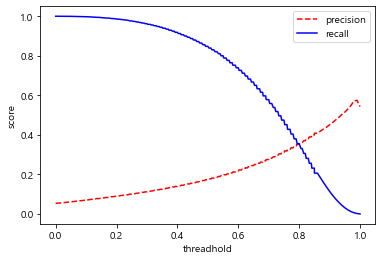

In [252]:
# 예측 확률
proba_rf_3 = rf_clf_3.predict_proba(X_test_3_scaled)
proba_rf_6월_3 = rf_clf_3.predict_proba(test_f_scaled_3)

# precision,recall은 trade off관계, precision_recall_curve( )
precision,recall,th = precision_recall_curve(y_test,proba_rf_3[:,1])

plt.xlabel('threadhold') #임계값
plt.ylabel('score')
plt.plot(th,precision[:len(th)],'red',linestyle = '--',label = 'precision')
plt.plot(th,recall[:len(th)],'blue',label = 'recall')
plt.legend()
plt.show()

In [253]:
from sklearn.preprocessing import Binarizer

for i in np.arange(0,1,0.05):
    custom_threshold = i

    proba_rf_3_final = proba_rf_3[:,1].reshape(-1,1)

    binarizer = Binarizer(threshold=custom_threshold).fit(proba_rf_3_final)
    custom_pred = binarizer.transform(proba_rf_3_final)

    recall = recall_score(y_test, custom_pred)
    acc = accuracy_score(y_test, custom_pred)
    f1 = f1_score(y_test, custom_pred)
    precision = precision_score(y_test, custom_pred)
    print(f"임계값 {i}, 정확도:{acc:.4f}, 재현율:{recall}, 정밀도: {precision}, f1:{f1}")

임계값 0.0, 정확도:0.0746, 재현율:0.9999818500816746, 정밀도: 0.055215262926164736, f1:0.10465203153610621
임계값 0.05, 정확도:0.2009, 재현율:0.9991348538931575, 정밀도: 0.06334052854920515, f1:0.11912883965753171
임계값 0.1, 정확도:0.3076, 재현율:0.9969145138846875, 정밀도: 0.07225668619909571, f1:0.13474687532070664
임계값 0.15000000000000002, 정확도:0.3960, 재현율:0.9921531853106661, 정밀도: 0.08164887989385193, f1:0.15088105878862182
임계값 0.2, 정확도:0.4719, 재현율:0.9850505172726722, 정밀도: 0.09176178984493616, f1:0.1678844083693191
임계값 0.25, 정확도:0.5383, 재현율:0.9740758666586, 정밀도: 0.10269125652563535, f1:0.18579518736170375
임계값 0.30000000000000004, 정확도:0.5970, 재현율:0.9590598342307459, 정밀도: 0.1146006007525673, f1:0.20473667386692754
임계값 0.35000000000000003, 정확도:0.6499, 재현율:0.9394337225482485, 정밀도: 0.12777808864867712, f1:0.22495824019169675
임계값 0.4, 정확도:0.6980, 재현율:0.9127170427733076, 정밀도: 0.14241360104972012, f1:0.2463833679018798
임계값 0.45, 정확도:0.7415, 재현율:0.8799685401415693, 정밀도: 0.1588693786781893, f1:0.26914700107880857
임계값 0.5, 정확도:0.

In [254]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 값을 0.7로 설정
custom_threshold = 0.7

#즉 Positive 클래스의 컬럼 하나만 추출하여 Binarizer를 적용
proba_rf_3_final = proba_rf_3[:,1].reshape(-1,1)
proba_rf_6월_3_final = proba_rf_6월_3[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold).fit(proba_rf_3_final)
rf_custom_pred_3 = binarizer.transform(proba_rf_3_final)

proba_rf_6월_custom_3 = binarizer.transform(proba_rf_6월_3_final)

display_eval(y_test, rf_custom_pred_3)

[[2656165  234686]
 [  72918   92372]]
**************************************************

정확도 : 0.90, 정밀도 : 0.28, 재현율 : 0.56
f1-score : 0.38, auc : 0.74


In [255]:
rf_custom_pred_3_list = pd.DataFrame(rf_custom_pred_3).T.values.tolist()
rf_custom_pred_3_df = pd.DataFrame(rf_custom_pred_3_list)
rf_custom_pred_3_df = rf_custom_pred_3_df.transpose()
rf_custom_pred_3_df.columns = ['rf_custom_3']

In [256]:
rf_custom_pred_3_df.to_csv('custom_pred/rf_custom_pred_3_df.csv', index=False)

In [257]:
proba_rf_6월_custom_3_list = pd.DataFrame(proba_rf_6월_custom_3).T.values.tolist()
proba_rf_6월_custom_3_df = pd.DataFrame(proba_rf_6월_custom_3_list)
proba_rf_6월_custom_3_df = proba_rf_6월_custom_3_df.transpose()
proba_rf_6월_custom_3_df.columns = ['june_rf_3']

In [258]:
proba_rf_6월_custom_3_df.to_csv('custom_pred/rf_6월_custom_3_df.csv', index=False)

#### 모델 4(real_train_x4_scaled 사용)

In [259]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier

rf_clf_4 = RandomForestClassifier(random_state=42)
rf_clf_4.fit(real_train_x4_scaled, real_train_y4)
rf_preds_4 = rf_clf_4.predict(X_test_4_scaled)
rf_preds_final_4 = rf_clf_4.predict(test_f_scaled_4)

display_eval(y_test, rf_preds_4)

[[2248048  642803]
 [  26852  138438]]
**************************************************

정확도 : 0.78, 정밀도 : 0.18, 재현율 : 0.84
f1-score : 0.29, auc : 0.81


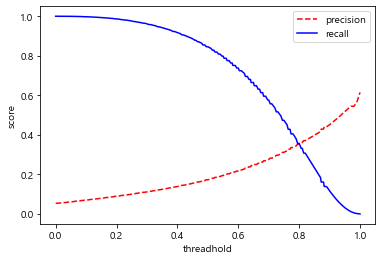

In [260]:
# 예측 확률
proba_rf_4 = rf_clf_4.predict_proba(X_test_4_scaled)
proba_rf_6월_4 = rf_clf_4.predict_proba(test_f_scaled_4)

# precision,recall은 trade off관계, precision_recall_curve( )
precision,recall,th = precision_recall_curve(y_test,proba_rf_4[:,1])

plt.xlabel('threadhold') #임계값
plt.ylabel('score')
plt.plot(th,precision[:len(th)],'red',linestyle = '--',label = 'precision')
plt.plot(th,recall[:len(th)],'blue',label = 'recall')
plt.legend()
plt.show()

In [261]:
from sklearn.preprocessing import Binarizer

for i in np.arange(0,1,0.05):
    custom_threshold = i

    proba_rf_4_final = proba_rf_4[:,1].reshape(-1,1)

    binarizer = Binarizer(threshold=custom_threshold).fit(proba_rf_4_final)
    custom_pred = binarizer.transform(proba_rf_4_final)

    recall = recall_score(y_test, custom_pred)
    acc = accuracy_score(y_test, custom_pred)
    f1 = f1_score(y_test, custom_pred)
    precision = precision_score(y_test, custom_pred)
    print(f"임계값 {i}, 정확도:{acc:.4f}, 재현율:{recall}, 정밀도: {precision}, f1:{f1}")

임계값 0.0, 정확도:0.0735, 재현율:0.9999758001088995, 정밀도: 0.055151624758336674, f1:0.10453768671961668
임계값 0.05, 정확도:0.1981, 재현율:0.9992921531853106, 정밀도: 0.06314626062947845, f1:0.11878629750116054
임계값 0.1, 정확도:0.3062, 재현율:0.9968963639663622, 정밀도: 0.07212156280529013, f1:0.13451172692920252
임계값 0.15000000000000002, 정확도:0.3955, 재현율:0.9923044346300441, 정밀도: 0.08159778794763788, f1:0.15079556617750828
임계값 0.2, 정확도:0.4715, 재현율:0.984838768225543, 정밀도: 0.09168811711097719, f1:0.16775802545473284
임계값 0.25, 정확도:0.5379, 재현율:0.9735374190816142, 정밀도: 0.10258312933496531, f1:0.18560841556464217
임계값 0.30000000000000004, 정확도:0.5971, 재현율:0.9583580373888317, 정밀도: 0.11454398468186525, f1:0.2046303317474322
임계값 0.35000000000000003, 정확도:0.6499, 재현율:0.9376852804162381, 정밀도: 0.12761367612852761, f1:0.22465330497204336
임계값 0.4, 정확도:0.6978, 재현율:0.9116764474559864, 정밀도: 0.14220773950742413, f1:0.24603736987160227
임계값 0.45, 정확도:0.7414, 재현율:0.8789097949059229, 정밀도: 0.15869574003939127, f1:0.2688482966464055
임계값 0.5, 정확

In [262]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 값을 0.7로 설정
custom_threshold = 0.7

#즉 Positive 클래스의 컬럼 하나만 추출하여 Binarizer를 적용
proba_rf_4_final = proba_rf_4[:,1].reshape(-1,1)
proba_rf_6월_4_final = proba_rf_6월_4[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold).fit(proba_rf_4_final)
rf_custom_pred_4 = binarizer.transform(proba_rf_4_final)

proba_rf_6월_custom_4 = binarizer.transform(proba_rf_6월_4_final)

display_eval(y_test, rf_custom_pred_4)

[[2657045  233806]
 [  73154   92136]]
**************************************************

정확도 : 0.90, 정밀도 : 0.28, 재현율 : 0.56
f1-score : 0.38, auc : 0.74


In [263]:
rf_custom_pred_4_list = pd.DataFrame(rf_custom_pred_4).T.values.tolist()
rf_custom_pred_4_df = pd.DataFrame(rf_custom_pred_4_list)
rf_custom_pred_4_df = rf_custom_pred_4_df.transpose()
rf_custom_pred_4_df.columns = ['rf_custom_4']

In [264]:
rf_custom_pred_4_df.to_csv('custom_pred/rf_custom_pred_4_df.csv', index=False)

In [265]:
proba_rf_6월_custom_4_list = pd.DataFrame(proba_rf_6월_custom_4).T.values.tolist()
proba_rf_6월_custom_4_df = pd.DataFrame(proba_rf_6월_custom_4_list)
proba_rf_6월_custom_4_df = proba_rf_6월_custom_4_df.transpose()
proba_rf_6월_custom_4_df.columns = ['june_rf_4']

In [266]:
proba_rf_6월_custom_4_df.to_csv('custom_pred/rf_6월_custom_4_df.csv', index=False)

#### 모델 5(real_train_x5_scaled 사용)

In [267]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier

rf_clf_5 = RandomForestClassifier(random_state=42)
rf_clf_5.fit(real_train_x5_scaled, real_train_y5)
rf_preds_5 = rf_clf_5.predict(X_test_5_scaled)
rf_preds_final_5 = rf_clf_5.predict(test_f_scaled_5)

display_eval(y_test, rf_preds_5)

[[2247098  643753]
 [  26738  138552]]
**************************************************

정확도 : 0.78, 정밀도 : 0.18, 재현율 : 0.84
f1-score : 0.29, auc : 0.81


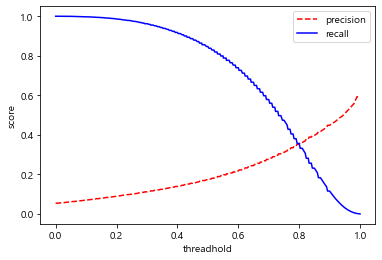

In [268]:
# 예측 확률
proba_rf_5 = rf_clf_5.predict_proba(X_test_5_scaled)
proba_rf_6월_5 = rf_clf_5.predict_proba(test_f_scaled_5)

# precision,recall은 trade off관계, precision_recall_curve( )
precision,recall,th = precision_recall_curve(y_test,proba_rf_5[:,1])

plt.xlabel('threadhold') #임계값
plt.ylabel('score')
plt.plot(th,precision[:len(th)],'red',linestyle = '--',label = 'precision')
plt.plot(th,recall[:len(th)],'blue',label = 'recall')
plt.legend()
plt.show()

In [269]:
from sklearn.preprocessing import Binarizer

for i in np.arange(0,1,0.05):
    custom_threshold = i

    proba_rf_5_final = proba_rf_5[:,1].reshape(-1,1)

    binarizer = Binarizer(threshold=custom_threshold).fit(proba_rf_5_final)
    custom_pred = binarizer.transform(proba_rf_5_final)

    recall = recall_score(y_test, custom_pred)
    acc = accuracy_score(y_test, custom_pred)
    f1 = f1_score(y_test, custom_pred)
    precision = precision_score(y_test, custom_pred)
    print(f"임계값 {i}, 정확도:{acc:.4f}, 재현율:{recall}, 정밀도: {precision}, f1:{f1}")

임계값 0.0, 정확도:0.0745, 재현율:0.9999818500816746, 정밀도: 0.055213418483819825, f1:0.10464871860133236
임계값 0.05, 정확도:0.2009, 재현율:0.9992316534575595, 정밀도: 0.06335162196538355, f1:0.11914914798652708
임계값 0.1, 정확도:0.3089, 재현율:0.9968600641297114, 정밀도: 0.07238179330218787, f1:0.1349638879389607
임계값 0.15000000000000002, 정확도:0.3976, 재현율:0.9922318349567427, 정밀도: 0.08185357629647079, f1:0.15123140740112342
임계값 0.2, 정확도:0.4729, 재현율:0.9848690180894186, 정밀도: 0.09191588112237552, f1:0.16813962315794367
임계값 0.25, 정확도:0.5390, 재현율:0.9741787161957771, 정밀도: 0.1028427997521891, f1:0.18604506065857887
임계값 0.30000000000000004, 정확도:0.5974, 재현율:0.9589025349385928, 정밀도: 0.11468336661746403, f1:0.2048651548150685
임계값 0.35000000000000003, 정확도:0.6503, 재현율:0.9385806763869563, 정밀도: 0.1278095140803182, f1:0.22498245247666612
임계값 0.4, 정확도:0.6980, 재현율:0.9124508439712021, 정밀도: 0.14235567066747715, f1:0.24628697309310857
임계값 0.45, 정확도:0.7412, 재현율:0.8793695928368322, 정밀도: 0.1586190038118498, f1:0.26875965545008845
임계값 0.5, 정확도:

In [270]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 값을 0.7로 설정
custom_threshold = 0.7

#즉 Positive 클래스의 컬럼 하나만 추출하여 Binarizer를 적용
proba_rf_5_final = proba_rf_5[:,1].reshape(-1,1)
proba_rf_6월_5_final = proba_rf_6월_5[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold).fit(proba_rf_5_final)
rf_custom_pred_5 = binarizer.transform(proba_rf_5_final)

proba_rf_6월_custom_5 = binarizer.transform(proba_rf_6월_5_final)

display_eval(y_test, rf_custom_pred_5)

[[2656592  234259]
 [  72703   92587]]
**************************************************

정확도 : 0.90, 정밀도 : 0.28, 재현율 : 0.56
f1-score : 0.38, auc : 0.74


In [271]:
rf_custom_pred_5_list = pd.DataFrame(rf_custom_pred_5).T.values.tolist()
rf_custom_pred_5_df = pd.DataFrame(rf_custom_pred_5_list)
rf_custom_pred_5_df = rf_custom_pred_5_df.transpose()
rf_custom_pred_5_df.columns = ['rf_custom_5']

In [272]:
rf_custom_pred_5_df.to_csv('custom_pred/rf_custom_pred_5_df.csv', index=False)

In [273]:
proba_rf_6월_custom_5_list = pd.DataFrame(proba_rf_6월_custom_5).T.values.tolist()
proba_rf_6월_custom_5_df = pd.DataFrame(proba_rf_6월_custom_5_list)
proba_rf_6월_custom_5_df = proba_rf_6월_custom_5_df.transpose()
proba_rf_6월_custom_5_df.columns = ['june_rf_5']

In [274]:
proba_rf_6월_custom_5_df.to_csv('custom_pred/rf_6월_custom_5_df.csv', index=False)

## 모델 기반 데이터 해석

In [290]:
# 컬럼들의 순서 보여줌
test_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3255482 entries, 10187132 to 13442613
Data columns (total 50 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   콜금리(%)                       float64
 1   loanapply_day                int64  
 2   application_id               int64  
 3   bank_id                      int64  
 4   product_id                   int64  
 5   loan_limit                   float64
 6   loan_rate                    float64
 7   user_id                      int64  
 8   birth_year                   float64
 9   credit_score                 float64
 10  yearly_income                float64
 11  desired_amount               float64
 12  existing_loan_cnt            float64
 13  existing_loan_amt            float64
 14  gender                       float64
 15  time_at_work                 float64
 16  생활물가지수                       float64
 17  소비자심리지수                      float64
 18  핀다                           float

In [305]:
import pandas as pd
real_train_x1_scaled_df = pd.DataFrame(real_train_x1_scaled, columns=test_f.columns)
real_train_x1_scaled_df.head()

,콜금리(%),loanapply_day,application_id,bank_id,product_id,loan_limit,loan_rate,user_id,birth_year,credit_score,...,purpose_전월세보증금,purpose_주택구입,purpose_투자,loanapply_week_Friday,loanapply_week_Monday,loanapply_week_Saturday,loanapply_week_Sunday,loanapply_week_Thursday,loanapply_week_Tuesday,loanapply_week_Wednesday
0,-0.20143,-0.08987,-0.94741,1.41829,-0.00799,1.04680,0.38594,-1.30113,0.19788,-0.66547,...,-0.17269,-0.16288,-0.12862,2.34742,-0.49296,-0.27483,-0.27900,-0.43296,-0.47502,-0.44693
1,-0.81019,-1.35566,-0.38711,-0.47047,0.19074,0.72763,1.07115,0.73361,0.59016,0.60554,...,-0.17269,-0.16288,-0.12862,2.34742,-0.49296,-0.27483,-0.27900,-0.43296,-0.47502,-0.44693
2,0.20441,-1.58581,1.42352,1.53276,-0.76317,0.86579,0.05515,-0.05290,0.39402,0.26660,...,5.79058,-0.16288,-0.12862,-0.42600,-0.49296,-0.27483,-0.27900,-0.43296,-0.47502,2.23750
3,0.88080,1.06084,0.44815,-1.27176,0.21062,-0.34163,-0.01573,1.39823,-0.58667,1.87654,...,-0.17269,-0.16288,-0.12862,-0.42600,-0.49296,-0.27483,-0.27900,-0.43296,-0.47502,2.23750
4,-0.81019,0.02520,1.60914,0.10188,-1.53822,-1.63033,1.30743,-1.14270,-0.19439,0.69027,...,-0.17269,-0.16288,-0.12862,-0.42600,-0.49296,-0.27483,-0.27900,-0.43296,-0.47502,2.23750


In [322]:
real_train_y1_df = pd.DataFrame(real_train_y1)
real_train_y1_df.head()

,is_applied
0,0.00000
1,0.00000
2,0.00000
3,0.00000
4,0.00000


# 로지스틱 summary

In [324]:
# 로지스틱 회귀를 이용해 summary 시도

import statsmodels.api as sm

# real_train_y1 는 목적 변수
logit = sm.Logit(real_train_y1, real_train_x1_scaled)
result = logit.fit()

# 분석결과 출력
print(result.summary())

         Current function value: 0.534465
         Iterations: 35


C:\Users\jwshi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                           Logit Regression Results                           
Dep. Variable:             is_applied   No. Observations:               771350
Model:                          Logit   Df Residuals:                   771305
Method:                           MLE   Df Model:                           44
Date:                Fri, 14 Oct 2022   Pseudo R-squ.:                  0.2289
Time:                        12:02:17   Log-Likelihood:            -4.1226e+05
converged:                      False   LL-Null:                   -5.3466e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0200      0.005      4.280      0.000       0.011       0.029
x2             0.0068      0.003      2.228      0.026       0.001       0.013
x3             0.0035      0.003      1.289      0.1

scaled를 한 값이므로 바로 위의 test_f.info()를 참고하여 칼럼을 비교
+ coef : 절댓값으로 미뤄보아 x10, test_f.info()의 9번인 즉 credit_score가 상당히 영향이 큰 것을 알 수 있음

In [284]:
# 오즈 비(Odds Ratio) 출력
print(np.exp(result.params))

x1    1.02021
x2    1.00680
x3    1.00347
x4    1.03452
x5    1.14416
x6    1.27343
x7    0.55134
x8    1.00777
x9    1.06499
x10   0.37551
x11   1.06003
x12   0.66284
x13   1.24645
x14   1.01577
x15   1.05152
x16   1.00044
x17   1.00932
x18   1.01055
x19   0.98022
x20   1.05592
x21   1.03298
x22   0.75888
x23   0.98211
x24   1.15849
x25   1.28094
x26   0.95957
x27   1.20577
x28   0.99564
x29   1.02542
x30   1.02070
x31   0.97730
x32   1.03223
x33   0.98413
x34   0.95948
x35   1.00788
x36   0.99589
x37   0.93640
x38   1.02959
x39   1.12680
x40   0.96212
x41   0.91446
x42   0.89740
x43   0.99858
x44   1.01027
x45   1.00809
x46   0.99168
x47   0.98735
x48   1.00109
x49   0.99674
x50   0.99844
dtype: float64


#### randomforest 변수 중요도

In [301]:
import pandas as pd
real_train_x2_scaled_df = pd.DataFrame(real_train_x2_scaled_df, columns=test_f.columns)

In [302]:
real_train_x2_scaled_df.head()

,콜금리(%),loanapply_day,application_id,bank_id,product_id,loan_limit,loan_rate,user_id,birth_year,credit_score,...,purpose_전월세보증금,purpose_주택구입,purpose_투자,loanapply_week_Friday,loanapply_week_Monday,loanapply_week_Saturday,loanapply_week_Sunday,loanapply_week_Thursday,loanapply_week_Tuesday,loanapply_week_Wednesday
0,-0.87704,0.60171,1.52248,-1.26962,0.21181,1.20769,-0.01502,-1.60407,-1.37169,-0.58079,...,-0.17387,-0.16323,-0.12823,-0.42647,2.02366,-0.27403,-0.27884,-0.43301,-0.47445,-0.44651
1,0.47581,0.14133,0.17081,0.56096,1.20503,-1.63289,-1.52741,-1.30901,0.68581,1.11148,...,-0.17387,-0.16323,-0.12823,-0.42647,-0.49415,-0.27403,3.58626,-0.43301,-0.47445,-0.44651
2,0.61109,-1.70016,-1.03694,-1.15521,-0.40398,-0.95692,1.23742,-0.19936,-0.29395,1.61916,...,-0.17387,-0.16323,-0.12823,2.34483,-0.49415,-0.27403,-0.27884,-0.43301,-0.47445,-0.44651
3,0.88166,1.06208,-1.22743,0.56096,1.20503,0.28913,-0.58217,0.93823,-0.48990,0.77303,...,-0.17387,-0.16323,-0.12823,-0.42647,-0.49415,-0.27403,-0.27884,-0.43301,-0.47445,2.23962
4,0.61109,0.14133,1.14401,0.10331,-1.53625,-2.01494,1.04837,-1.55115,0.39188,0.01151,...,-0.17387,-0.16323,-0.12823,-0.42647,-0.49415,-0.27403,-0.27884,-0.43301,2.10773,-0.44651


In [309]:
feature_importance = pd.DataFrame({
    'feature': real_train_x2_scaled_df.columns,
    'importance': rf_clf_1.feature_importances_
})
    feature_importance

,feature,importance
0,콜금리(%),0.02725
1,loanapply_day,0.02915
2,application_id,0.04191
3,bank_id,0.04556
4,product_id,0.04950
5,loan_limit,0.05487
6,loan_rate,0.09046
7,user_id,0.04152
8,birth_year,0.03751
9,credit_score,0.13841


In [313]:
feature_importance.sort_values('importance', inplace=True, ascending=False)

In [314]:
import plotly.express as px
# 중요도별 순서 확인하기.
fig = px.bar(feature_importance, x='feature', y='importance')
fig.show()

### confusion_matrix 파악

In [326]:
# logisticregression confusion_matrix
display_eval(y_test, lr_custom_pred_1)

[[2573605  317246]
 [  90657   74633]]
**************************************************

정확도 : 0.87, 정밀도 : 0.19, 재현율 : 0.45
f1-score : 0.27, auc : 0.67


In [325]:
# lightGBM confusion_matrix
display_eval(y_test, lgbm_custom_pred_1)

[[2729779  161072]
 [  94993   70297]]
**************************************************

정확도 : 0.92, 정밀도 : 0.30, 재현율 : 0.43
f1-score : 0.35, auc : 0.68


In [327]:
# randomforest confusion_matrix
display_eval(y_test, rf_custom_pred_1)

[[2655783  235068]
 [  72599   92691]]
**************************************************

정확도 : 0.90, 정밀도 : 0.28, 재현율 : 0.56
f1-score : 0.38, auc : 0.74
